# London Crime Prediction using Machine Learning

# Defining the problem

The aim of this study is to train a machine learning model that can accurately predict the occurrence of the next crime based on historical data for a specific crime type. The study assumes that there may be links and connections between individual crimes that can be identified by a machine learning approach but not by traditional statistical methods. By developing a predictive model, the study aims to create a tool that can assist police in dynamically allocating their limited resources to areas where crime is likely to occur. The study will focus on a specific crime type and will use data from individual crime records, despite the fact that these records may not be linked to each other in any obvious way. The study will demonstrate the potential of machine learning in creating a safer environment in London by identifying potential crime activities in certain areas and allocating police resources accordingly.

# The Dataset

The data set is sourced from the UK police department's offical website, specifically from the section dedicated to providing public access to police data(https://data.police.uk/data/). I have requested information regarding stop and search practices in the City of London between 2019 December and 2022 November. The data provides information about the number of stop and searches conducted during this time period, which is used in this project to analyze trends and patterns focusing to predict locations and time of next occurrence of crime. The reason for choosing the stop and search data is that it is the only data available containing information about the actual location in latitude and longitude of the crime and the actual time of the crime that was recorded in standard format(YYYY-MM-DD HH:MM:SS). Although, I have try requesting other data from the police department, but they were not able to provide me the data contains what I need. Below is the data columns and their description.

- Type: Type of stop and search conducted
- Date: Year, month and day of stop and search
- Part of a policing operation: Whether the stop and search was part of a policing operation
- Policing operation: If part of a policing operation, the name of the operation
- Latitude: Latitude of the location of the stop and search
- Longitude: Longitude of the location of the stop and search
- Gender
- Age range
- Self-defined ethnicity
- Officer-defined ethnicity
- Legislation
- Object of search
- Outcome: Sanctions given to the person searched when is found guilty
- Outcome linked to object of search
- Removal of more than just outer clothing

# Hypothesis

- There is a link between individual crimes that can be identified by a machine learning approach, but not by traditional statistical methods.
- Machine learning can accurately predict the occurrence of the next crime based on historical data for a specific crime type.
- A predictive model developed using machine learning can assist police in dynamically allocating their limited resources to areas where crime is likely to occur.
- Machine learning can identify potential crime activities in certain areas and help create a safer environment in London.

## Load Data

In [53]:
import pandas as pd

In [54]:
# read data from csv file into pandas dataframe
df = pd.read_csv('merged.csv')
df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2019-12-01T01:48:53+00:00,NaN,NaN,51.516814,-0.081620,Male,25-34,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False
1,Person search,2019-12-01T02:17:49+00:00,NaN,NaN,51.513952,-0.085833,Male,over 34,White - Any other White background,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,True,False
2,Person and Vehicle search,2019-12-02T01:24:53+00:00,NaN,NaN,51.520744,-0.089858,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
3,Person search,2019-12-02T01:47:31+00:00,NaN,NaN,NaN,NaN,Male,over 34,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False
4,Person and Vehicle search,2019-12-02T02:09:00+00:00,NaN,NaN,51.517184,-0.076747,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8044 entries, 0 to 8043
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type                                      8044 non-null   object 
 1   Date                                      8044 non-null   object 
 2   Part of a policing operation              0 non-null      float64
 3   Policing operation                        0 non-null      float64
 4   Latitude                                  6299 non-null   float64
 5   Longitude                                 6299 non-null   float64
 6   Gender                                    8037 non-null   object 
 7   Age range                                 7410 non-null   object 
 8   Self-defined ethnicity                    7589 non-null   object 
 9   Officer-defined ethnicity                 7586 non-null   object 
 10  Legislation                         

In [56]:
import warnings
warnings.filterwarnings('ignore') # to ignore warnings in the output cell to keep the notebook clean

***
## Data pre processing

Data pre processing with raw data, dropping sensitive data and row with empty values

In [57]:
# keep only Outcome linked to object of search is True
df = df[df['Outcome linked to object of search'] == True]

The above line of code filters the DataFrame 'df' to keep only rows where the 'Outcome linked to object of search' column is True. The purpse of this action is to focus the instances where the outcome of the search is directly related to the object of search, to avoid false inspection relate to the object of search.

In [58]:
# drop the columns that are not needed becuase now it only contains True values for Outcome linked to object of search
df.drop(['Outcome linked to object of search'], axis=1, inplace=True)

In [59]:
# drop columns that are completely empty
df.drop(['Part of a policing operation','Policing operation','Legislation'], axis=1, inplace=True)

In [60]:
# drop ethnicity related columns as it is sensitive data
df.drop(['Self-defined ethnicity'], axis=1, inplace=True)
df.drop(['Officer-defined ethnicity'], axis=1, inplace=True)

In [61]:
# remove latitudes and longitudes rows that are NaN
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [62]:
# focus on drug related searches only 
df = df[df['Object of search'] == 'Controlled drugs']
# drop object of search column as it is not needed anymore as it only contains Controlled drugs
df.drop(['Object of search'], axis=1, inplace=True)

In [63]:
import folium
from IPython.display import display
loc = df.dropna(subset=["Latitude", "Longitude"])
map_ = folium.Map(location=[loc["Latitude"].mean(), loc["Longitude"].mean()], zoom_start=7, min_zoom=7, max_zoom=7)
for lat, lon in zip(loc["Latitude"], loc["Longitude"]):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_)
display(map_)

Removing outliers from the data set to ensure that the location of the crime is within the City of London, otherwise the outliers will influence the model performance as they are noise.

In [64]:
# remove locations that are not in London
df = df[df.Latitude <= 52]
df.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Outcome,Removal of more than just outer clothing
10,Person search,2019-12-03T09:48:08+00:00,51.517431,-0.082458,Male,18-24,Arrest,False
12,Person search,2019-12-04T02:53:26+00:00,51.516814,-0.081620,Male,25-34,A no further action disposal,False
13,Person search,2019-12-04T03:15:57+00:00,51.513114,-0.086272,Male,over 34,Arrest,False
14,Person search,2019-12-04T06:36:19+00:00,51.518060,-0.110683,Male,25-34,Penalty Notice for Disorder,False
16,Person search,2019-12-04T12:37:18+00:00,51.517680,-0.078484,Male,18-24,Khat or Cannabis warning,False


In [65]:
# drop rows with NaN values
loc = df.dropna(subset=["Latitude", "Longitude"])

# create a folium map centered on the mean of the latitudes and longitudes
map_ = folium.Map(location=[loc["Latitude"].mean(), loc["Longitude"].mean()], zoom_start=15, min_zoom=15, max_zoom=15)

# iterate over the rows of the dataframe and add a circle marker for each point
for lat, lon in zip(loc["Latitude"], loc["Longitude"]):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_)

# display the map
display(map_)

In [66]:
# remove Gender columns from the dataframe as it is sensitive data
df.drop(['Gender'], axis=1, inplace=True)

In [67]:
# drop sanction outcome becuase police sanction decison is not a consideration as all searches are true for Outcome linked to object of search
df.drop(['Outcome'], axis=1, inplace=True)

In [68]:
# drop age range becuase it might create bias to certain age groups
df.drop(['Age range'], axis=1, inplace=True)

In [69]:
# Convert the boolean column to an integer column
df['Removal of more than just outer clothing'] = df['Removal of more than just outer clothing'].astype(int)

In [70]:
df

,Type,Date,Latitude,Longitude,Removal of more than just outer clothing
10,Person search,2019-12-03T09:48:08+00:00,51.517431,-0.082458,0
12,Person search,2019-12-04T02:53:26+00:00,51.516814,-0.081620,0
13,Person search,2019-12-04T03:15:57+00:00,51.513114,-0.086272,0
14,Person search,2019-12-04T06:36:19+00:00,51.518060,-0.110683,0
16,Person search,2019-12-04T12:37:18+00:00,51.517680,-0.078484,0
...,...,...,...,...,...
7991,Person search,2022-11-23T19:07:30+00:00,51.519045,-0.097078,0
7997,Person and Vehicle search,2022-11-24T13:16:19+00:00,51.519045,-0.097078,0
8002,Person search,2022-11-24T16:01:19+00:00,51.513631,-0.086019,0
8020,Person and Vehicle search,2022-11-26T21:42:06+00:00,51.512770,-0.118367,0


<Axes: >

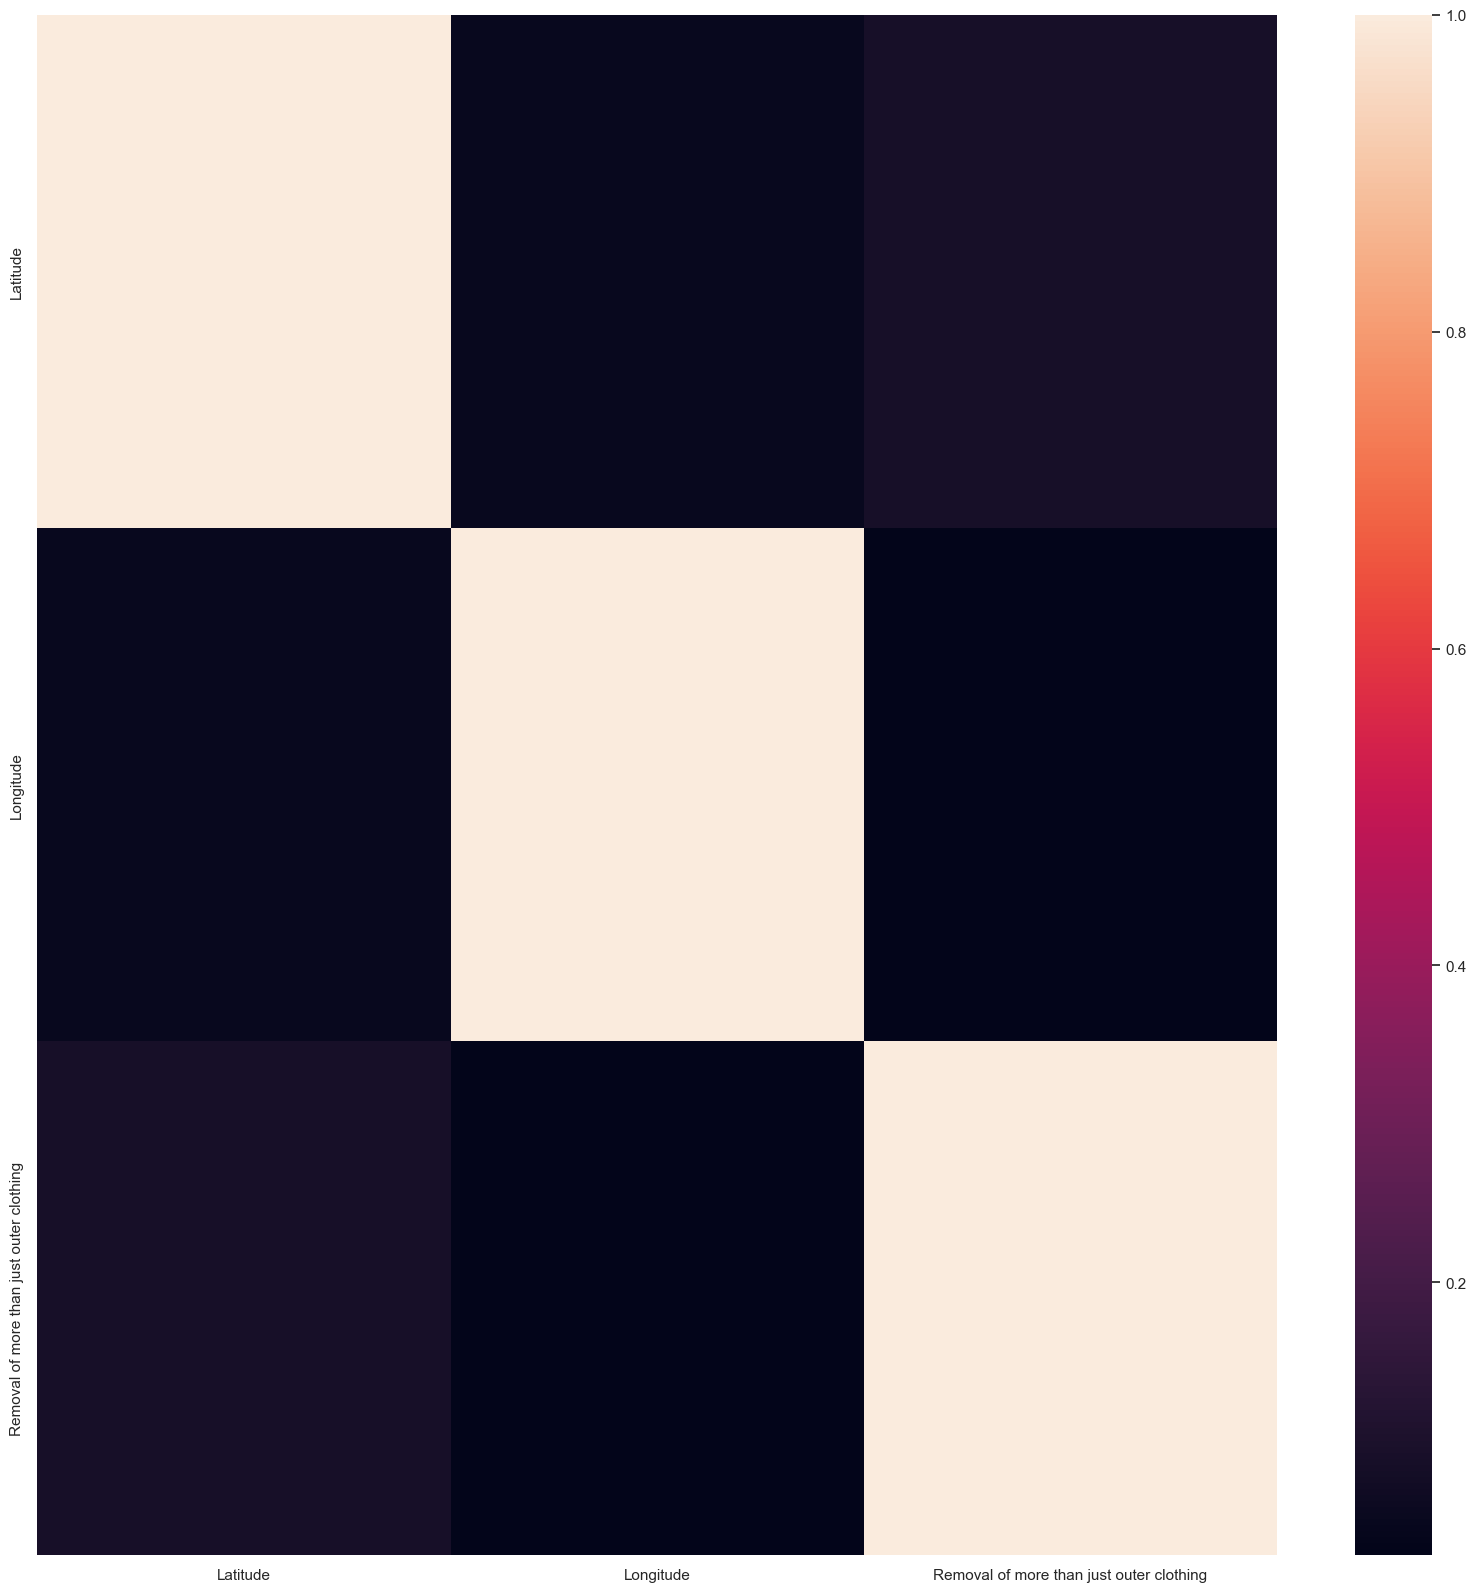

In [71]:
#  calculate the correlation matrix
corr = df.corr()
# plot the heatmap
import seaborn as sns
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

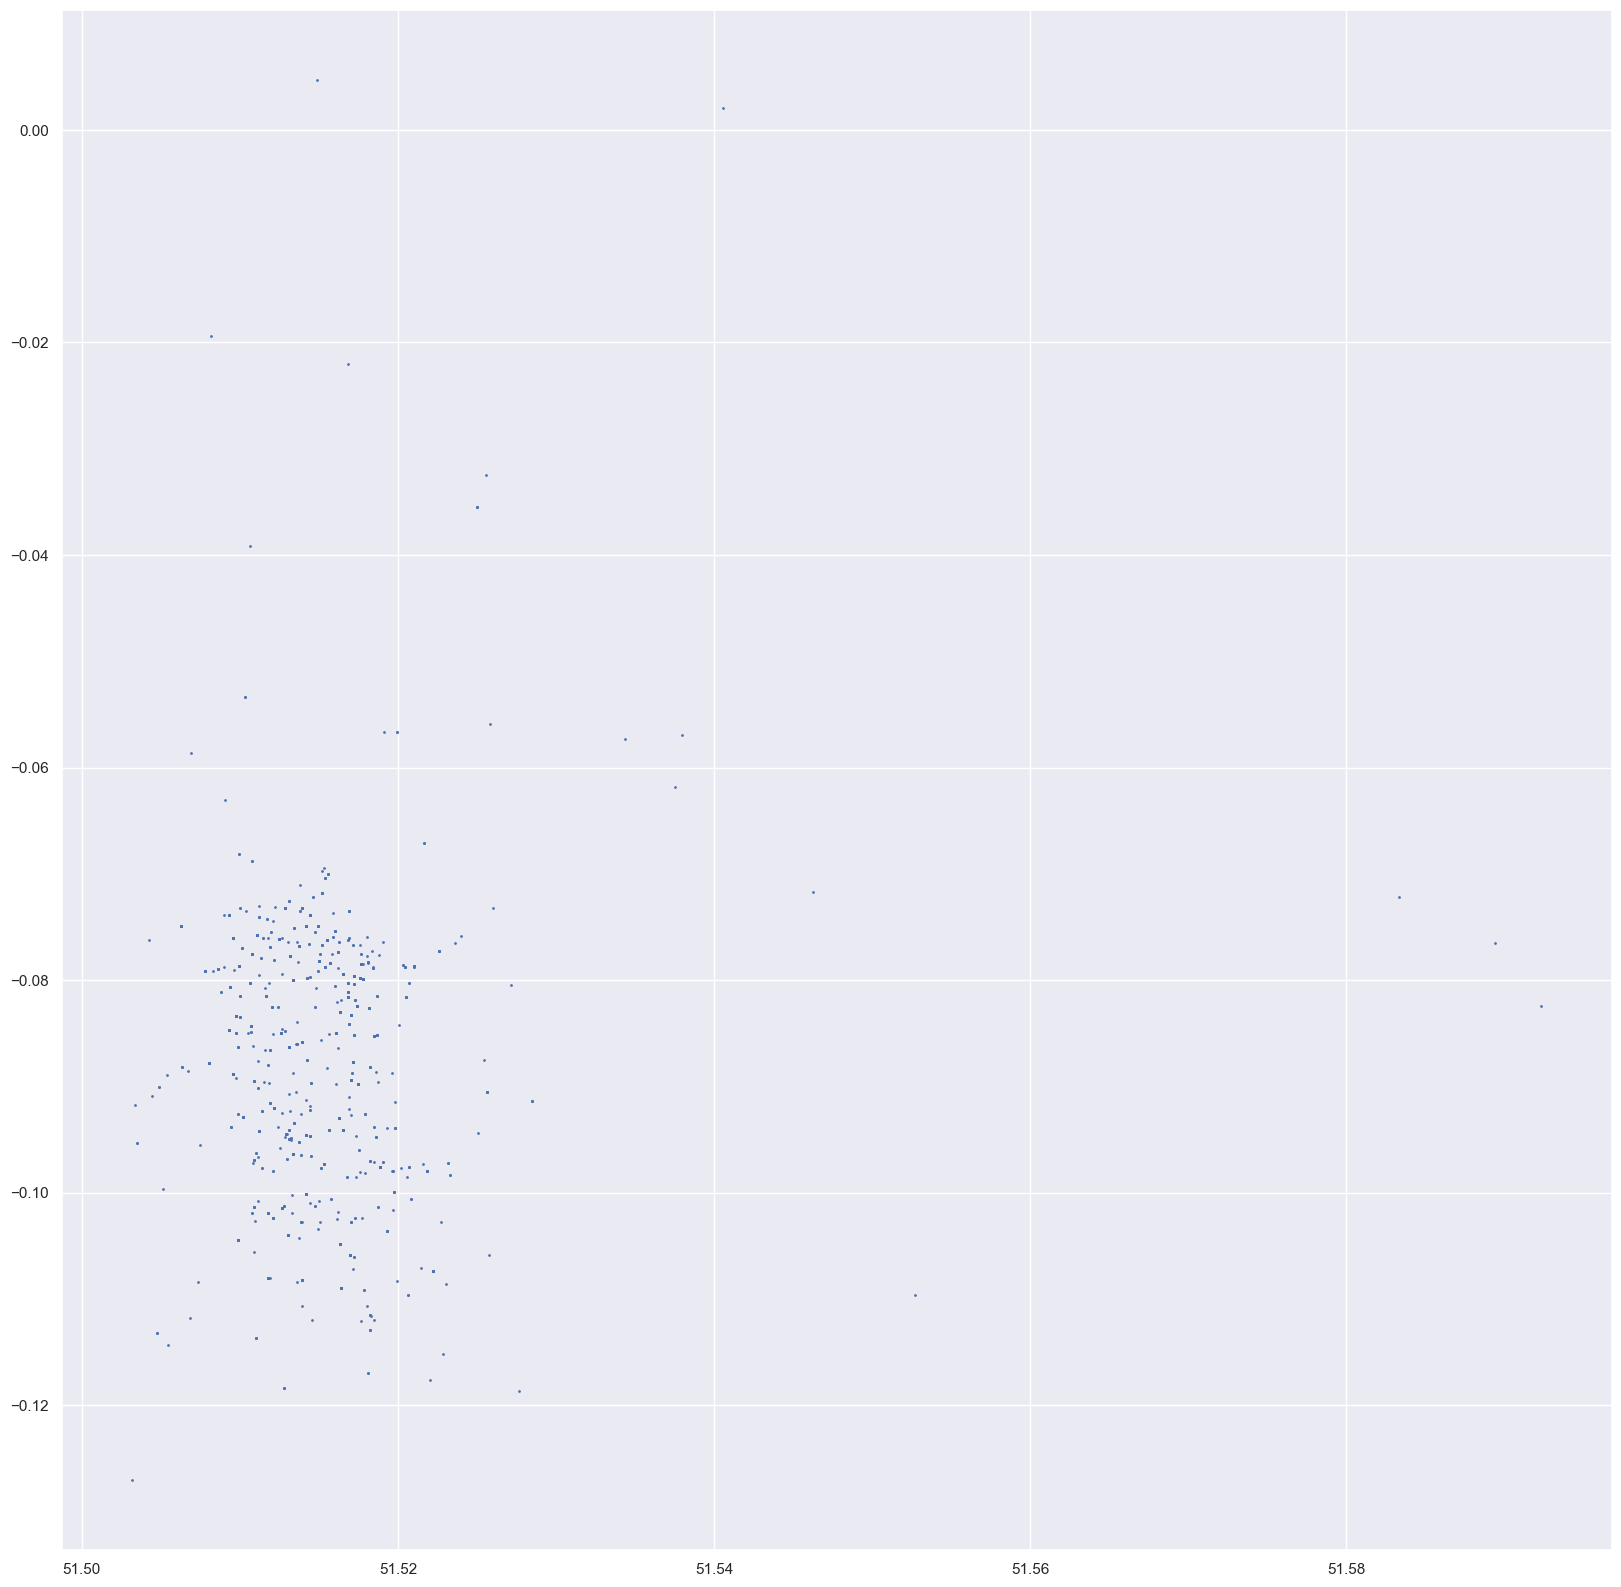

In [72]:
# plot a distribution in x = latitude and y = longitude to see the distribution of the data
import matplotlib.pyplot as plt
plt.scatter(df['Latitude'], df['Longitude'], s=1)
plt.show()

***
# Split data into train and test 70/30 ratio

In [73]:
train_size =int(len(df)*0.70) 
test_size = len(df) - train_size

In [74]:
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [75]:
# rest the index of the dataframes
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

### Encode Type

In [76]:
# onehot encode the type
from sklearn.preprocessing import OneHotEncoder
type_onehot = OneHotEncoder(handle_unknown='ignore' , sparse=False) # create the encoder
type_onehot.fit(train_data[['Type']]) # fit the encoder to the train data

# transform the train and test data
train_type = type_onehot.transform(train_data[['Type']])
test_type = type_onehot.transform(test_data[['Type']])

# create a dataframe from the encoded data
train_type = pd.DataFrame(train_type, columns=type_onehot.get_feature_names_out(['Type']))
test_type = pd.DataFrame(test_type, columns=type_onehot.get_feature_names_out(['Type']))

# concat the encoded data to the train and test data
train_data = pd.concat([train_data, train_type], axis=1)
test_data = pd.concat([test_data, test_type], axis=1)

# drop the type column from the train and test data
train_data.drop(['Type'], axis=1, inplace=True)
test_data.drop(['Type'], axis=1, inplace=True)

### Categorise the time, in every 8 hours, 3 shifts for 24 hours police work

In [77]:
# Extract the hour component from the "Date" column and create a new "Time" column
train_data['Time'] = pd.to_datetime(train_data['Date']).dt.hour

# Add 1 to all values in the "Time" column to make the first hour 1 instead of 0
train_data['Time'] = train_data['Time'] + 1

# Create 3-hour intervals for the "Time" column and add it to new columns "Shift1", "Shift2", "Shift3"
shifts = pd.get_dummies(pd.cut(train_data['Time'], bins=[0, 8, 16, 24], labels=['Shift1', 'Shift2', 'Shift3']))
train_data[shifts.columns] = shifts

# Drop the "Time" column
train_data.drop(['Time'], axis=1, inplace=True)

In [78]:
# Extract the hour component from the "Date" column and create a new "Time" column
test_data['Time'] = pd.to_datetime(test_data['Date']).dt.hour

# Add 1 to all values in the "Time" column to make the first hour 1 instead of 0
test_data['Time'] = test_data['Time'] + 1

# Create 3-hour intervals for the "Time" column and add it to new columns "Shift1", "Shift2", "Shift3"
shifts = pd.get_dummies(pd.cut(test_data['Time'], bins=[0, 8, 16, 24], labels=['Shift1', 'Shift2', 'Shift3']))
test_data[shifts.columns] = shifts

# Drop the "Time" column
test_data.drop(['Time'], axis=1, inplace=True)

In [79]:
# check shape
train_data.shape, test_data.shape

((933, 9), (400, 9))

In [80]:
# extract the week day of the Date column and add it to a new column called week Day
train_data['Week Day'] = pd.to_datetime(train_data['Date']).dt.dayofweek

# extract the month of the Date column and add it to a new column called Month
train_data['Month'] = pd.to_datetime(train_data['Date']).dt.month

In [81]:
test_data['Week Day'] = pd.to_datetime(test_data['Date']).dt.dayofweek
test_data['Month'] = pd.to_datetime(test_data['Date']).dt.month

In [82]:
# increment all values in the Week Day column by 1 to make the first day 1 instead of 0
train_data['Week Day'] = train_data['Week Day'] + 1

In [83]:
test_data['Week Day'] = test_data['Week Day'] + 1

In [84]:
# show Week Day unique values counts
train_data['Week Day'].value_counts()

5    168
4    163
3    139
6    129
2    120
7    108
1    106
Name: Week Day, dtype: int64

In [85]:
test_data['Week Day'].value_counts()

5    82
4    66
6    64
3    64
1    47
2    42
7    35
Name: Week Day, dtype: int64

In [86]:
# show Month unique values counts
train_data['Month'].value_counts()

7     134
12     88
3      83
9      79
6      77
4      74
11     74
10     72
8      70
5      65
1      64
2      53
Name: Month, dtype: int64

In [87]:
test_data['Month'].value_counts()

5     48
4     42
11    40
8     39
1     34
12    33
7     33
3     30
2     26
10    26
6     25
9     24
Name: Month, dtype: int64

In [88]:
# One-hot encode the 'Week Day', 'Month', 'Day',columns and create new DataFrames
weekday_onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
weekday_onehot.fit(train_data[['Week Day']])
train_weekday = weekday_onehot.transform(train_data[['Week Day']])
test_weekday = weekday_onehot.transform(test_data[['Week Day']])
train_weekday = pd.DataFrame(train_weekday, columns=weekday_onehot.get_feature_names_out(['Week Day']))
test_weekday = pd.DataFrame(test_weekday, columns=weekday_onehot.get_feature_names_out(['Week Day']))

# Concatenate the one-hot encoded columns to the original DataFrame
train_data = pd.concat([train_data, train_weekday], axis=1)
test_data = pd.concat([test_data, test_weekday], axis=1)

# Drop the original 'Week Day' column
train_data.drop(['Week Day'], axis=1, inplace=True)
test_data.drop(['Week Day'], axis=1, inplace=True)


In [89]:
month_onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
month_onehot.fit(train_data[['Month']])
train_month = month_onehot.transform(train_data[['Month']])
test_month = month_onehot.transform(test_data[['Month']])
train_month = pd.DataFrame(train_month, columns=month_onehot.get_feature_names_out(['Month']))
test_month = pd.DataFrame(test_month, columns=month_onehot.get_feature_names_out(['Month']))

# Concatenate the one-hot encoded columns to the original DataFrame
train_data = pd.concat([train_data, train_month], axis=1)
test_data = pd.concat([test_data, test_month], axis=1)

# Drop the original 'Month' column
train_data.drop(['Month'], axis=1, inplace=True)
test_data.drop(['Month'], axis=1, inplace=True)

In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      933 non-null    object 
 1   Latitude                                  933 non-null    float64
 2   Longitude                                 933 non-null    float64
 3   Removal of more than just outer clothing  933 non-null    int32  
 4   Type_Person and Vehicle search            933 non-null    float64
 5   Type_Person search                        933 non-null    float64
 6   Shift1                                    933 non-null    uint8  
 7   Shift2                                    933 non-null    uint8  
 8   Shift3                                    933 non-null    uint8  
 9   Week Day_1                                933 non-null    float64
 10  Week Day_2                            

In [91]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      400 non-null    object 
 1   Latitude                                  400 non-null    float64
 2   Longitude                                 400 non-null    float64
 3   Removal of more than just outer clothing  400 non-null    int32  
 4   Type_Person and Vehicle search            400 non-null    float64
 5   Type_Person search                        400 non-null    float64
 6   Shift1                                    400 non-null    uint8  
 7   Shift2                                    400 non-null    uint8  
 8   Shift3                                    400 non-null    uint8  
 9   Week Day_1                                400 non-null    float64
 10  Week Day_2                            

In [92]:
# show head of the data
train_data.head()

,Date,Latitude,Longitude,Removal of more than just outer clothing,Type_Person and Vehicle search,Type_Person search,Shift1,Shift2,Shift3,Week Day_1,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2019-12-03T09:48:08+00:00,51.517431,-0.082458,0,0.0,1.0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2019-12-04T02:53:26+00:00,51.516814,-0.081620,0,0.0,1.0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2019-12-04T03:15:57+00:00,51.513114,-0.086272,0,0.0,1.0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2019-12-04T06:36:19+00:00,51.518060,-0.110683,0,0.0,1.0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2019-12-04T12:37:18+00:00,51.517680,-0.078484,0,0.0,1.0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [93]:
test_data.head()

,Date,Latitude,Longitude,Removal of more than just outer clothing,Type_Person and Vehicle search,Type_Person search,Shift1,Shift2,Shift3,Week Day_1,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2021-11-21T03:41:39+00:00,51.517534,-0.095960,0,0.0,1.0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2021-11-22T01:31:19+00:00,51.518864,-0.097562,0,1.0,0.0,1,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2021-11-22T02:46:47+00:00,51.509930,-0.068161,0,0.0,1.0,1,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2021-11-26T06:32:54+00:00,51.516814,-0.081620,0,0.0,1.0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2021-11-27T01:25:50+00:00,51.516814,-0.081620,0,0.0,1.0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [94]:
# drop the Date column
train_data.drop(['Date'], axis=1, inplace=True)
test_data.drop(['Date'], axis=1, inplace=True)

In [95]:
# conver all the type to float 64
train_data = train_data.astype('float64')

In [96]:
test_data = test_data.astype('float64')

<Axes: >

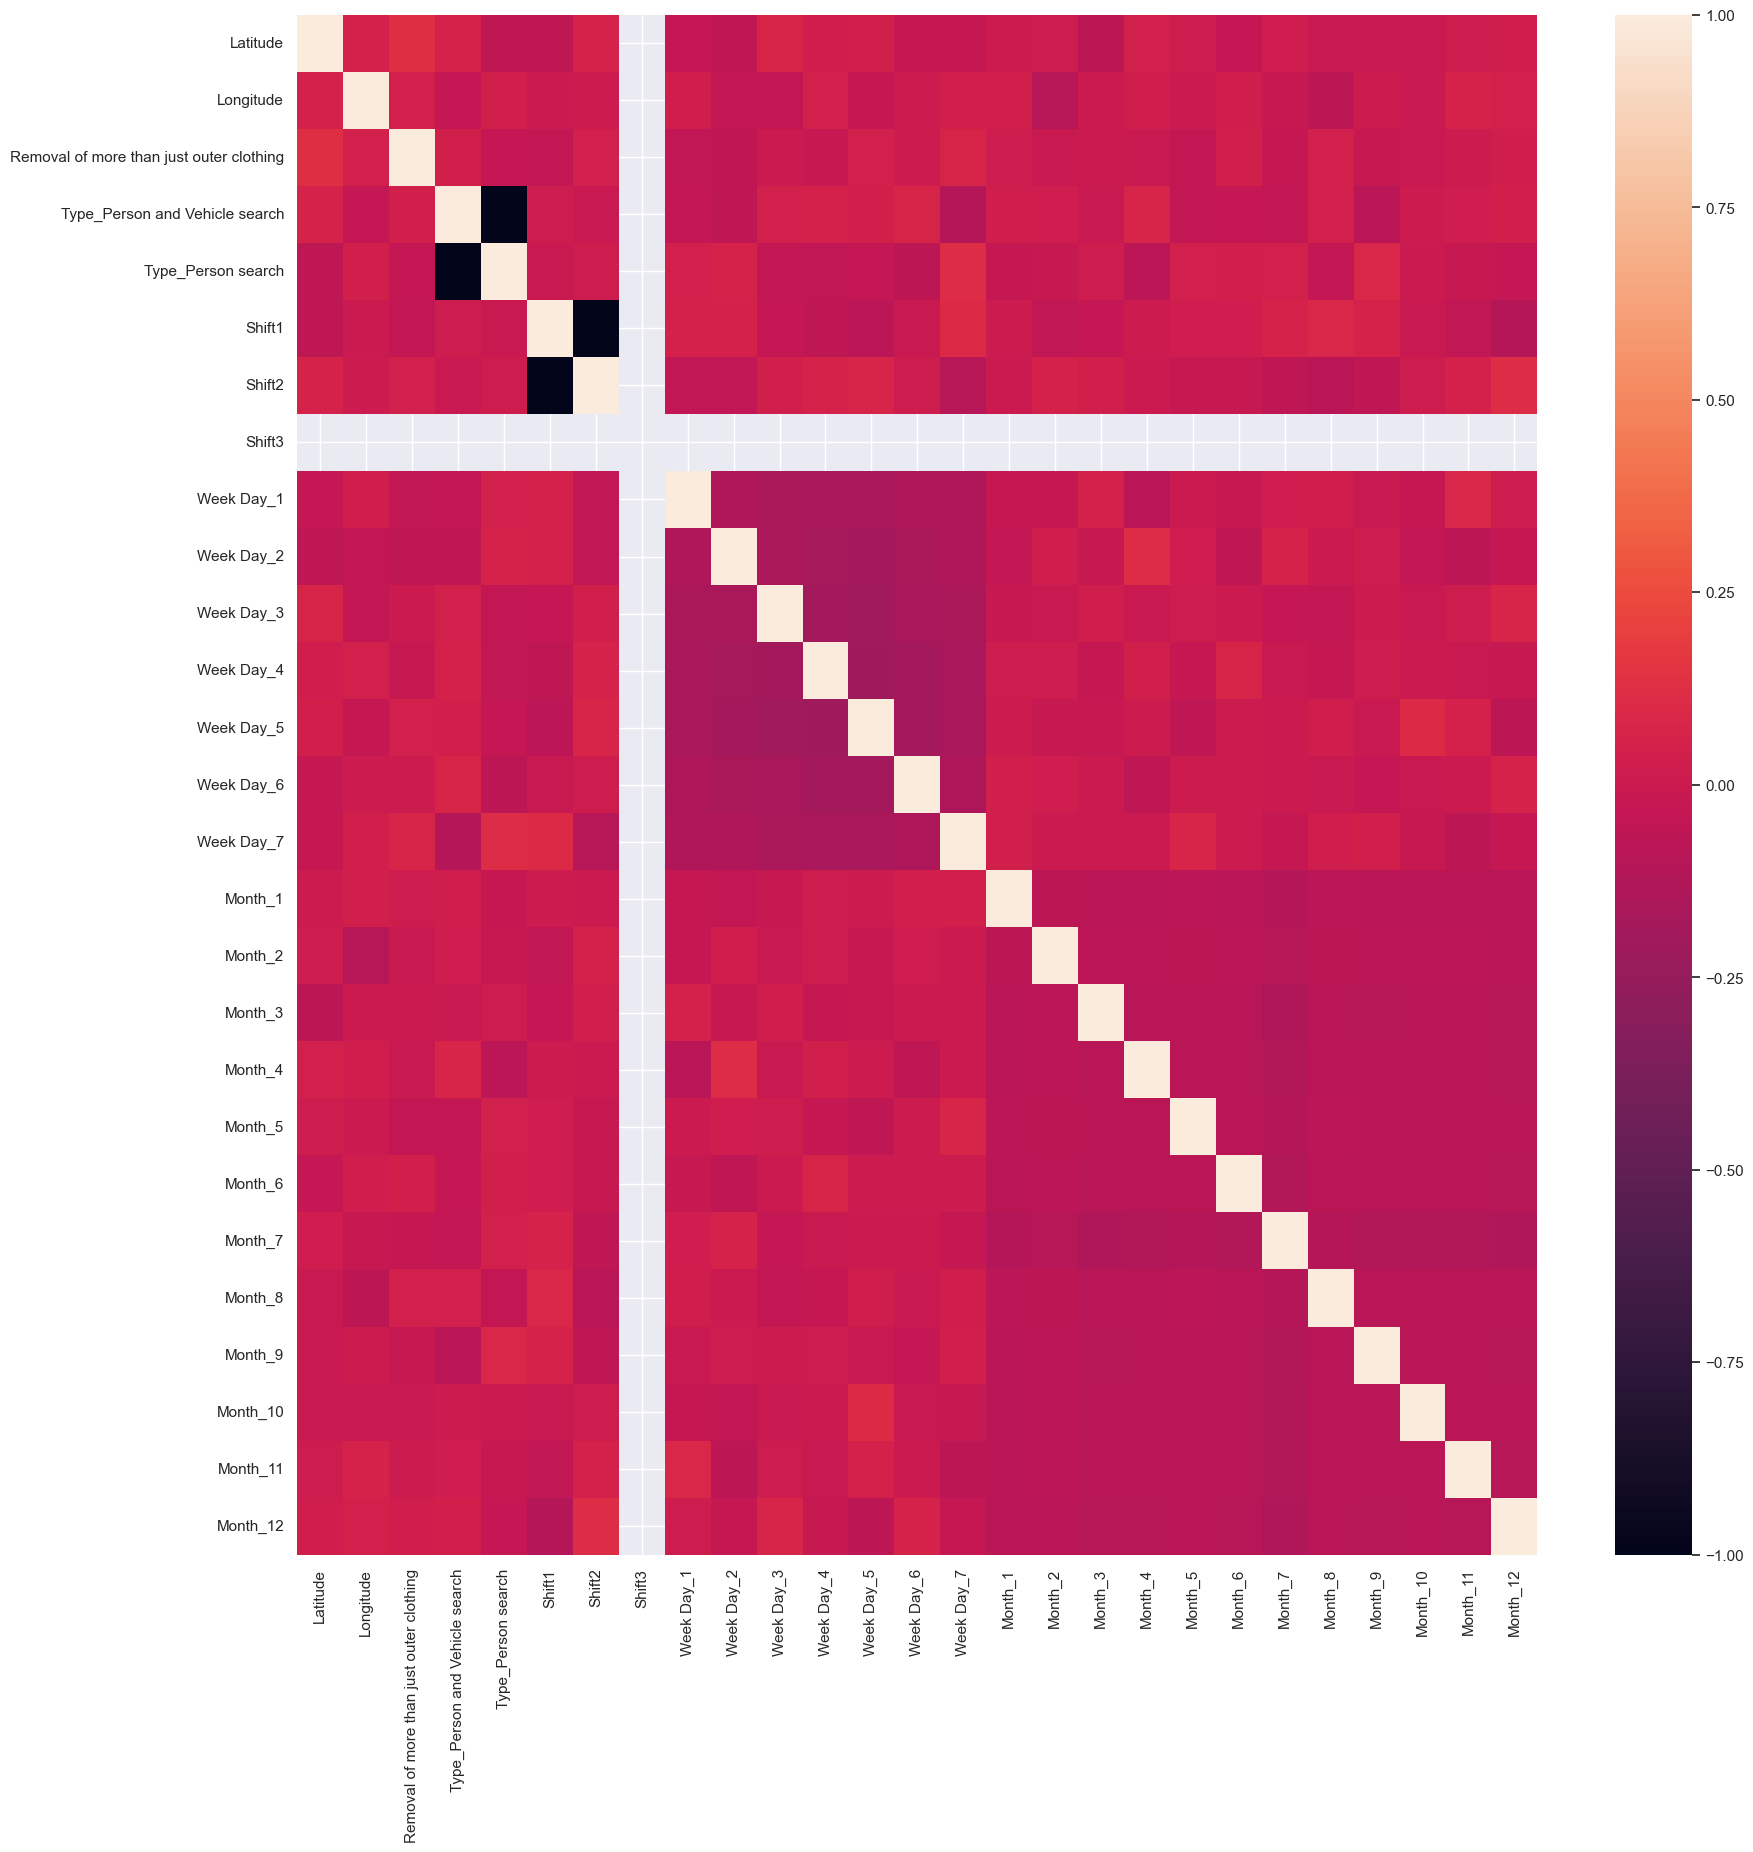

In [97]:
# show correlation matrix
corr = train_data.corr()
# plot the heatmap with larger size
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

The above heatmap shows the correlation between the features. The darker the colour, the higher the correlation and the lighter the colour, the lower the correlation. The correlation between the features is not very high, which means that the features are not highly correlated with each other. The heat map values range from -1 (black) to 1 (white), with 0 indicating no correlation (pink). Majority of the features scored around 0.00, which suggests that there were no significant correlations between those features.Type_person_search and Type_person_and_vehicle_search had no correlation at all, which was represented by a black color on the heat map. This lack of correlation was also observed with Shift1 and Shift2.

Highly correlated features can have a significant impact on the model's performance. When two or more features have been spected to be highly correlated, it means that they provide similar information to the model. This can lead to overfitting the model, which can result in poor generalization performance to new data. On the same hand, highly correlated features can also increase computational time and complexity. On the other hand, low correlated features can also impact the model's performance. When features are less correlated, it indicates that there are not enough information, less informative and will contruibute less to the model's performance. 

<Axes: >

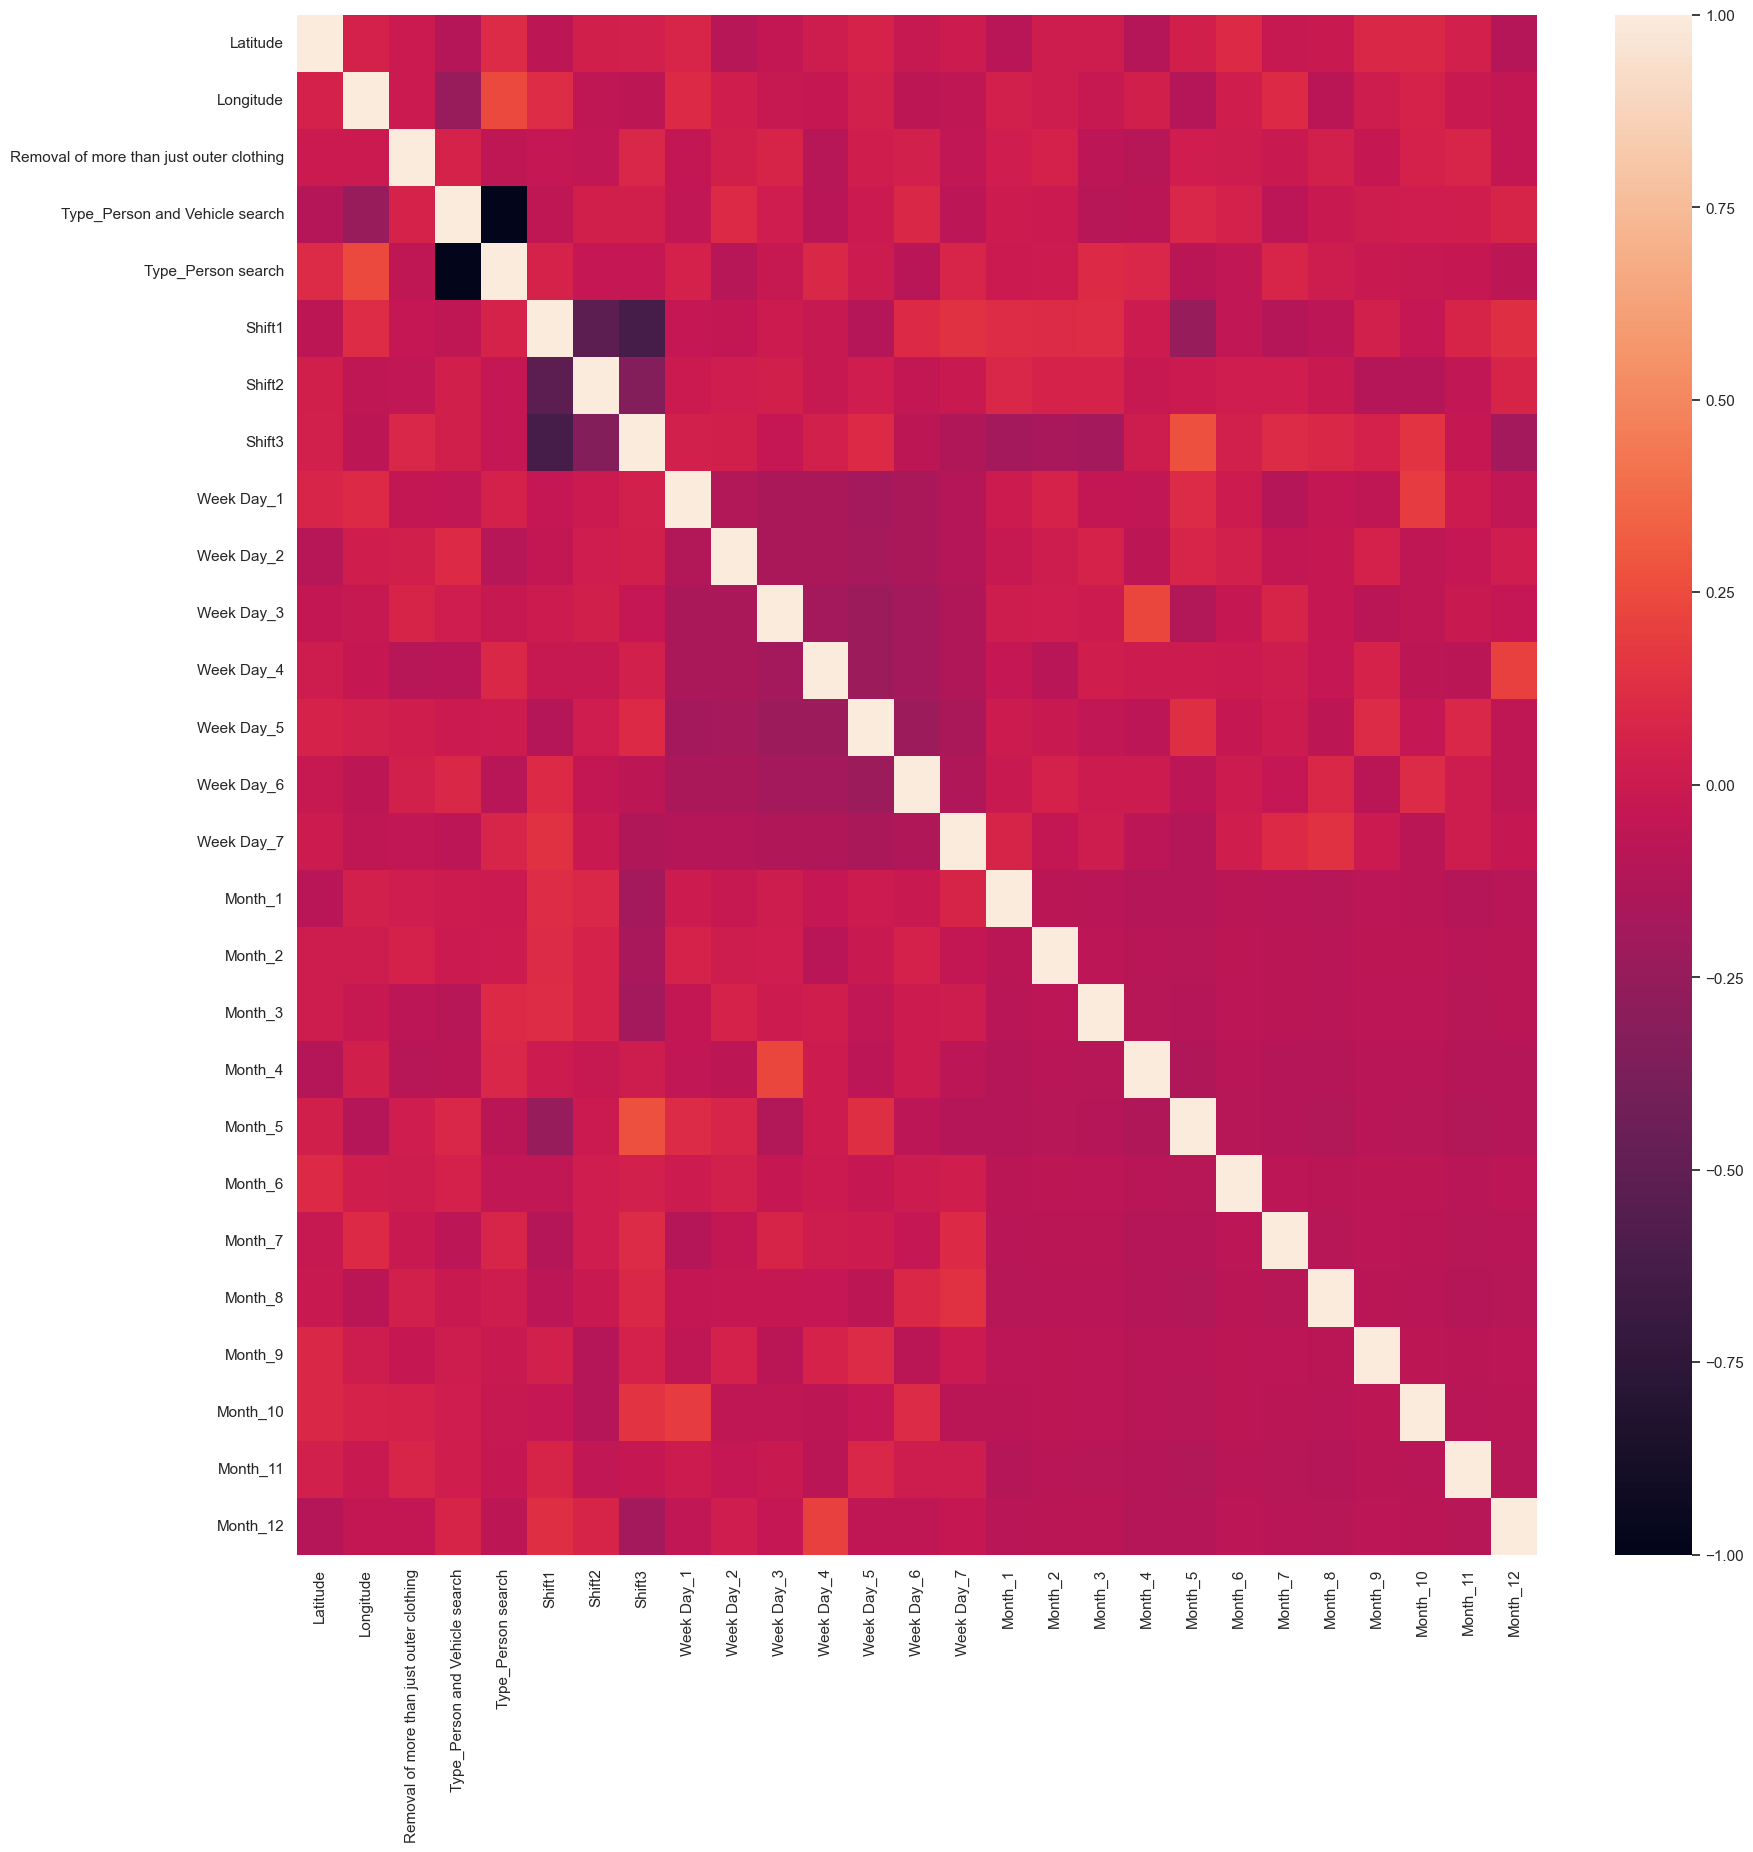

In [98]:
# show correlation matrix
corr = test_data.corr()
# plot the heatmap with larger size
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

***
# Define X and y

Define the target and lable for the model, X is the features and y is the target, also becuase I want the model to predict the future, I will need to shift the y by 1 row, so the model will predict the next row as their target. Then drop the tails to ensure the length of X and y are the same.

In [99]:
x_train = train_data
y_train_shift = train_data[['Shift1', 'Shift2', 'Shift3']].shift(-1) 
y_train_location = train_data[['Latitude', 'Longitude']].shift(-1)
# drop the last row
x_train = x_train[:-1]
y_train_shift = y_train_shift[:-1]
y_train_location = y_train_location[:-1]
# print the shape of the data
x_train.shape, y_train_shift.shape, y_train_location.shape

((932, 27), (932, 3), (932, 2))

In [100]:
x_test = test_data
y_test_shift = test_data[['Shift1', 'Shift2', 'Shift3']].shift(-1)
y_test_location = test_data[['Latitude', 'Longitude']].shift(-1)
# drop the last row
x_test = x_test[:-1]
y_test_shift = y_test_shift[:-1]
y_test_location = y_test_location[:-1]
# print the shape of the data
x_test.shape, y_test_shift.shape, y_test_location.shape

((399, 27), (399, 3), (399, 2))

## Scale the data using MinMaxScaler

In [101]:
from sklearn.preprocessing import MinMaxScaler
# scale the data
scaler = MinMaxScaler()
x_train_original = x_train.copy()
x_test_original = x_test.copy()
x_train = scaler.fit_transform(x_train) # fit and transform
x_test = scaler.transform(x_test) # only transform

***
# Create the model

## Random Forest

Random Forest is a type of ensemble learning algorithm that is a group of predictors, 

### Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [ 256, 1024, 4096,6144,8192], # number of trees in the forest
    'max_depth': [10, 20, 30, 40, 50], # maximum depth of the tree
    'max_features': ['sqrt','log2',0.2, 0.4, 0.6, 0.8,1.0] # number of features to consider at every split 1 = all features which turns to bagged trees and more randomness can be achieved by using smaller values
}

In [103]:
# Create the Random Forest Regressor object
rf = RandomForestRegressor(random_state=42)

# Create the Grid Search object
grid_search = GridSearchCV(rf,  # the model
                           param_grid=param_grid,  # the parameter grid
                           cv=5, # number of folds cross validation
                           verbose= 0, # verbosity level (0 = no output)
                           scoring ='neg_mean_squared_error' # scoring metric
                           )

In [104]:
# Fit the Grid Search object to the training data
grid_search.fit(x_train, y_train_location)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8,
                                          1.0],
                         'n_estimators': [256, 1024, 4096, 6144, 8192]},
             scoring='neg_mean_squared_error')

In [178]:
# get the best parameters and best score
grid_search.best_params_, grid_search.best_score_

({'max_depth': 10, 'max_features': 'log2', 'n_estimators': 256},
 -0.00010244125055504762)

In [179]:
# ({'max_depth': 10, 'max_features': 'log2', 'n_estimators': 256},
# create a check model to verify the accuracy of the model is true increase number of max_depth 10 to 20
rf_location_check_result = pd.DataFrame(columns=['max_depth', 'neg_mean_squared_error','neg_mean_absolute_error' ])
for i in range(10, 21):
    rf_check = RandomForestRegressor(max_depth=i, 
                                     n_estimators=256,
                                     max_features='log2',
                                     random_state=42,
                                    )
    rf_check.fit(x_train, y_train_location)
    y_pred_location_check = rf_check.predict(x_train_original)
    
    # calculate scores
    mse = mean_squared_error(y_train_location, y_pred_location_check)
    mae = mean_absolute_error(y_train_location, y_pred_location_check)

    # append the scores to the dataframe
    rf_location_check_result = pd.concat([rf_location_check_result, pd.DataFrame([[i, mse, mae]], columns=['max_depth', 
                                                                                                           'neg_mean_squared_error',
                                                                                                           'neg_mean_absolute_error' ])], axis=0)
    
rf_location_check_result

,max_depth,neg_mean_squared_error,neg_mean_absolute_error
0,10,0.000123,0.008681
0,11,0.000120,0.008443
0,12,0.000127,0.008866
0,13,0.000133,0.009216
0,14,0.000124,0.008659
0,15,0.000121,0.008468
0,16,0.000125,0.008778
0,17,0.000123,0.008634
0,18,0.000117,0.008212
0,19,0.000117,0.008263


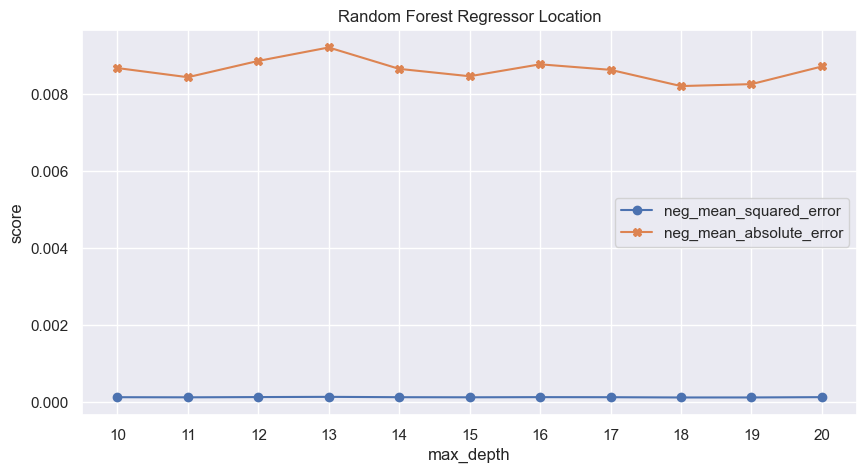

In [180]:
# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(rf_location_check_result['max_depth'], rf_location_check_result['neg_mean_squared_error'], label='neg_mean_squared_error',marker='o')
plt.plot(rf_location_check_result['max_depth'], rf_location_check_result['neg_mean_absolute_error'], label='neg_mean_absolute_error',marker='X')
plt.legend(['neg_mean_squared_error', 'neg_mean_absolute_error'])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Random Forest Regressor Location')
plt.xticks(range(10,21))
plt.show()

Make a prediction on the test data

In [181]:
# extract the best model from the grid search
rf_regression_best_model = grid_search.best_estimator_

In [182]:
# Make predictions on the test set using the best model
rf_y_train_location = rf_regression_best_model.predict(x_train)

In [183]:
rf_y_test_location = rf_regression_best_model.predict(x_test)

In [184]:
# Evaluate the model using the mean squared error metric
regression_mse = mean_squared_error(y_test_location, rf_y_test_location)
print(f"Location regression mean squared error: {regression_mse}")

regression_mae = mean_absolute_error(y_test_location, rf_y_test_location)
print(f"Location regression mean absolute error: {regression_mae}")

Location regression mean squared error: 7.089964574863813e-05
Location regression mean absolute error: 0.005972484691665933


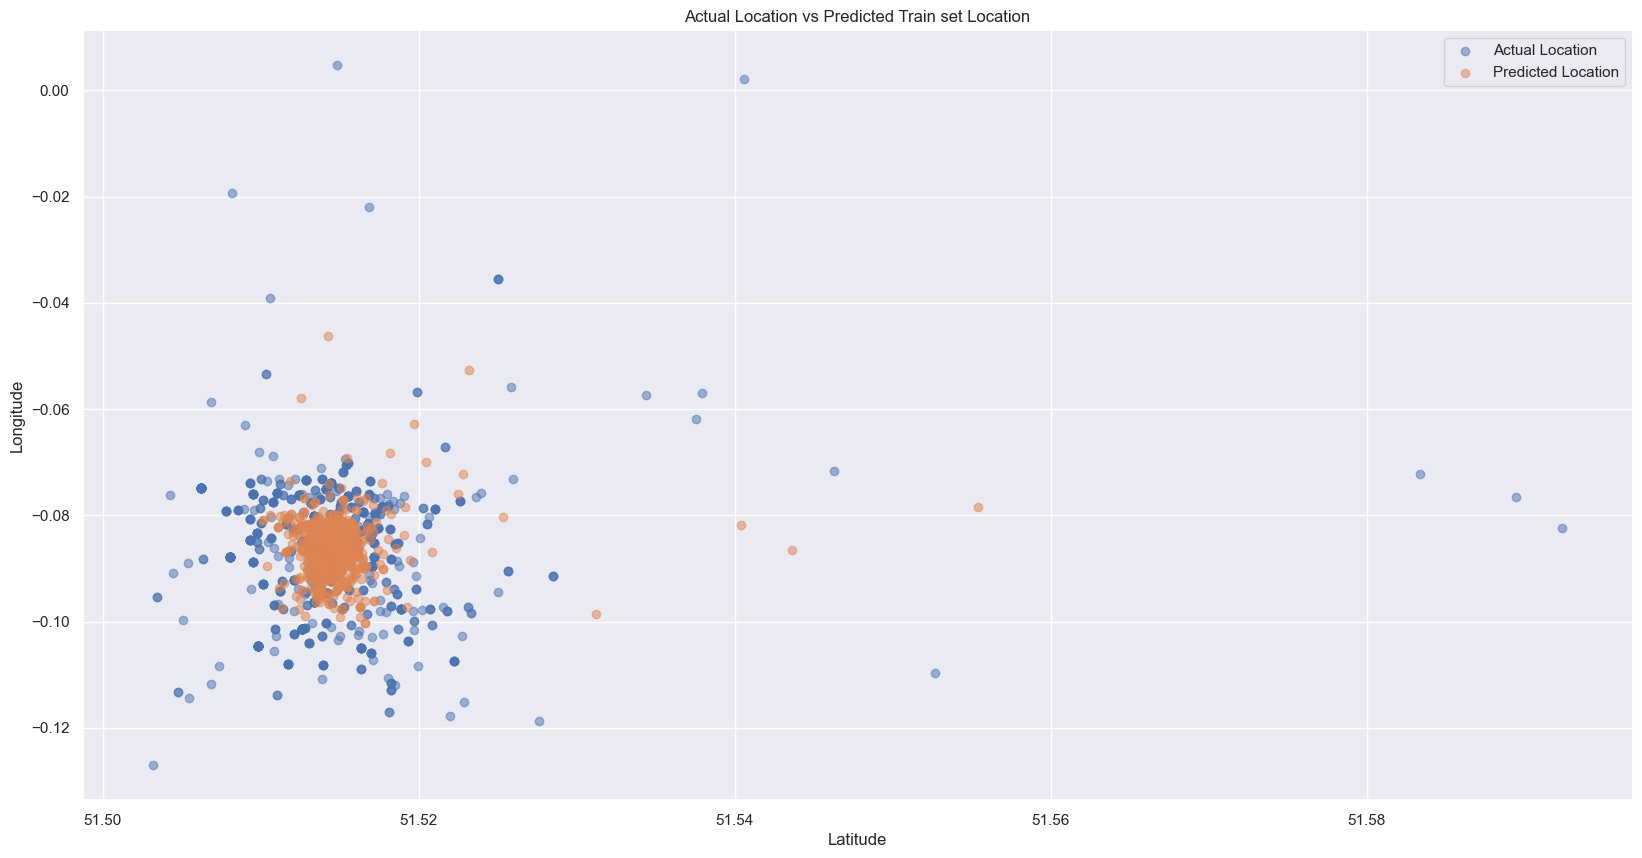

In [185]:
# Scatter plot 2d 
plt.figure(figsize=(20,10)) # set the size of the figure 
plt.scatter(x_train_original['Latitude'], x_train_original['Longitude'], label='Actual Location', alpha=0.5) # plot the actual train location
plt.scatter(rf_y_train_location[:,0], rf_y_train_location[:,1], label='Predicted Location', alpha=0.5) # plot the predicted location
plt.legend()
plt.title('Actual Location vs Predicted Train set Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

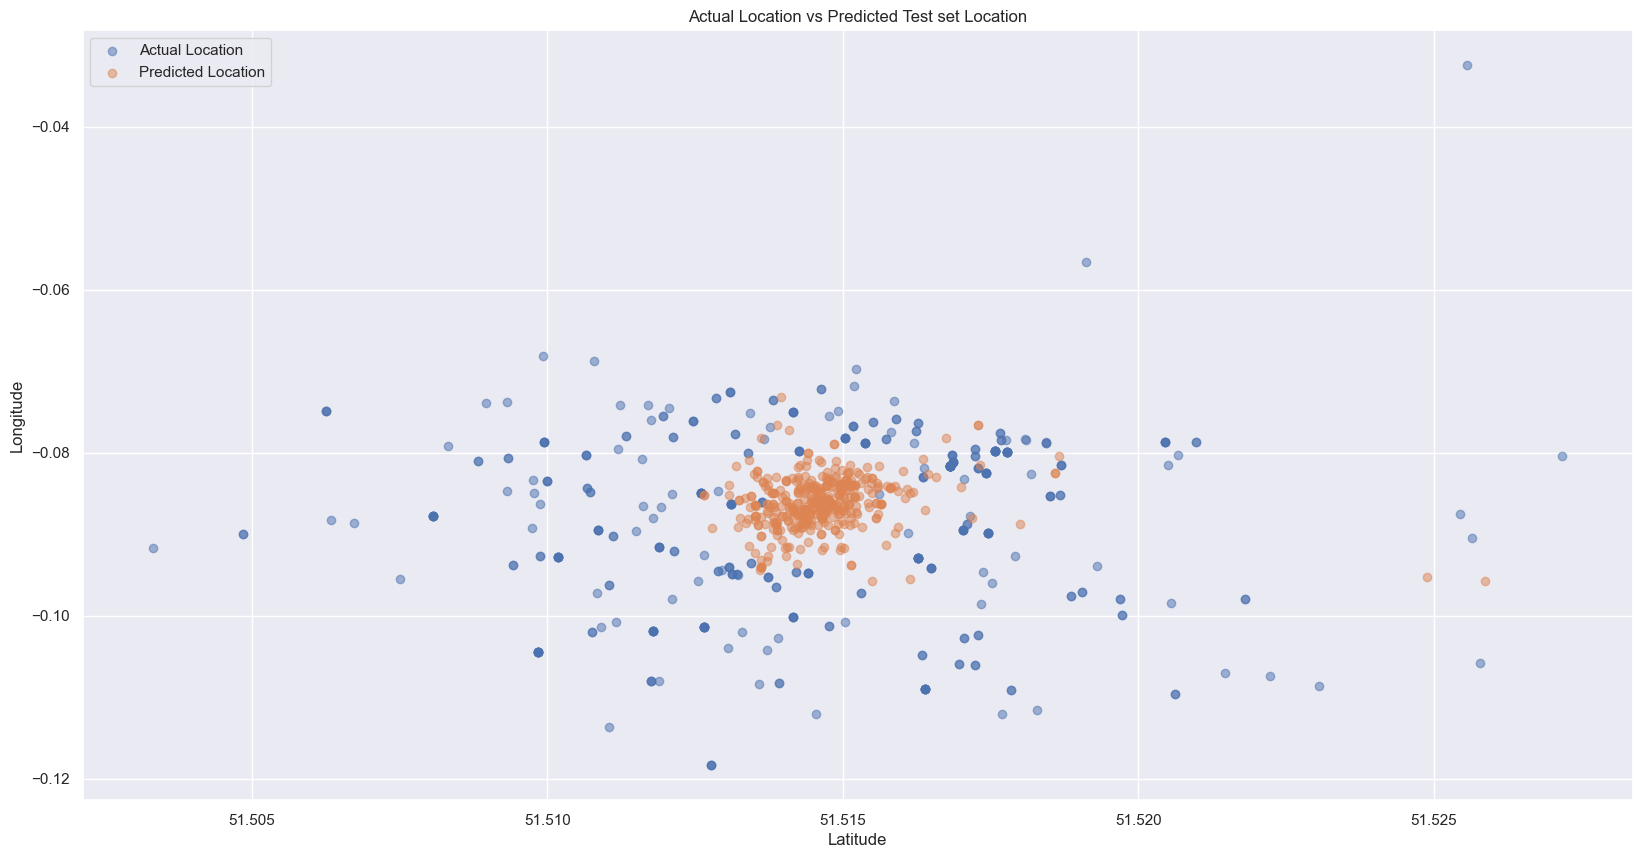

In [186]:
# Scatter plot 2d 
plt.figure(figsize=(20,10)) # set the size of the figure
plt.scatter(x_test_original['Latitude'], x_test_original['Longitude'], label='Actual Location', alpha=0.5) # plot the actual test location
plt.scatter(rf_y_test_location[:,0], rf_y_test_location[:,1], label='Predicted Location', alpha=0.5) # plot the predicted location
plt.legend() 
plt.title('Actual Location vs Predicted Test set Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

##### Error Distances

In [187]:
# calculate the actual distance between the predicted and the correct location 
from geopy.distance import geodesic
distance = []
for i in range(len(rf_y_test_location)):
    distance.append(geodesic((rf_y_test_location[i][0], rf_y_test_location[i][1]), 
                             (y_test_location.iloc[i][0], y_test_location.iloc[i][1])).meters)


# convert distance to pd
rf_distance = pd.DataFrame(distance, columns=['Distance'])

rf_distance.describe()

,Distance
count,399.000000
mean,760.198950
std,459.443413
min,19.512225
25%,466.280127
50%,638.412089
75%,977.229064
max,4034.566695


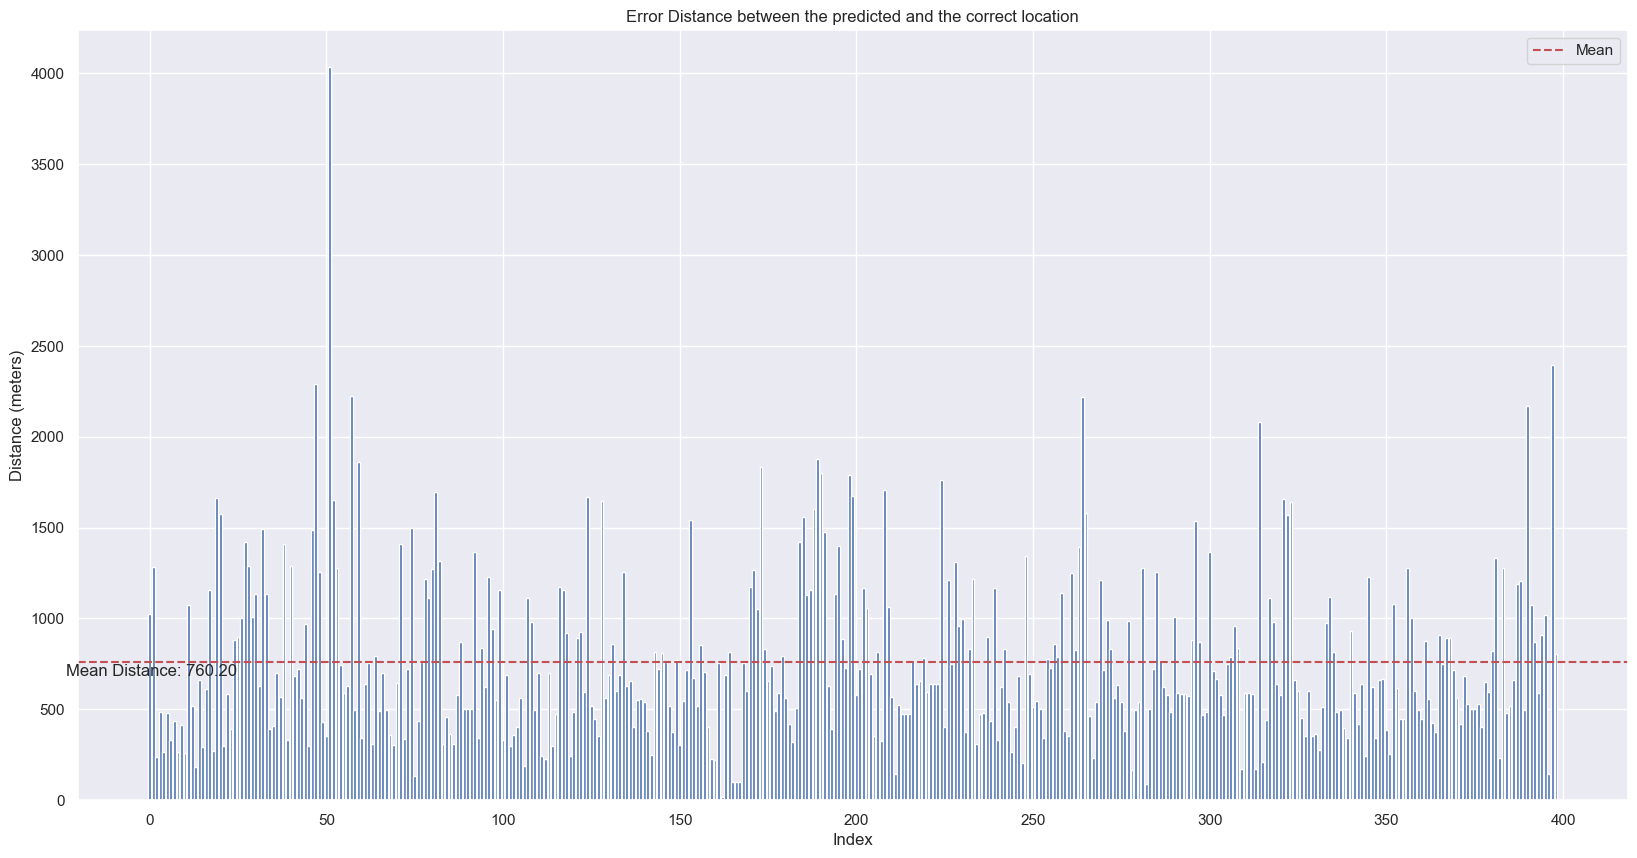

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # set the size of the figure

# plot the actual test location
plt.bar(rf_distance.index, rf_distance['Distance'])

# plot the predicted location
plt.axhline(rf_distance['Distance'].mean(), color='r', linestyle='--', label='Mean')

# add legend
plt.legend()

# add title and labels
plt.title('Error Distance between the predicted and the correct location')
plt.xlabel('Index')
plt.ylabel('Distance (meters)')

# add mean distance text annotation
plt.text(0.5, 0.9*rf_distance['Distance'].mean(), f'Mean Distance: {rf_distance["Distance"].mean():.2f}', ha='center')

plt.show()


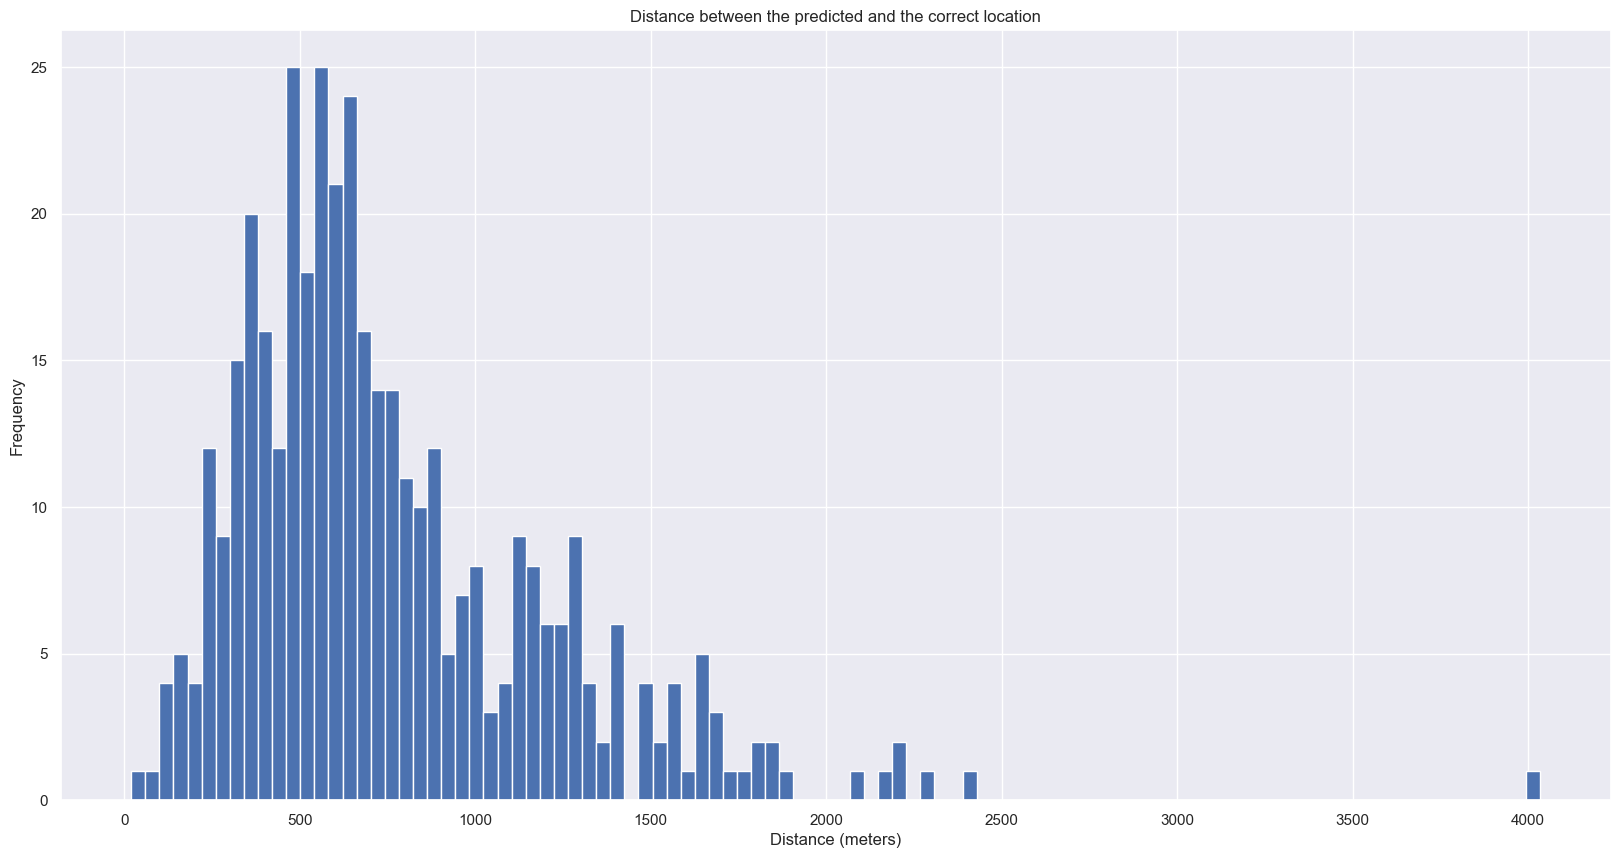

In [189]:
# histogram of the distance error
plt.figure(figsize=(20,10))
plt.hist(rf_distance['Distance'], bins=100)
plt.title('Distance between the predicted and the correct location')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.show()

### Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid to search over
randomForest_grid_params = {'criterion': ['gini'],
                            'max_depth': [5,10,20,30],
                            'min_samples_split': [3,5,10],
                            'n_estimators': [ 256, 1024, 4096,6144,8192],
                            }

# Create the Grid Search object
grid_search_clf = GridSearchCV(RandomForestClassifier(random_state=42), 
                               randomForest_grid_params,  
                               cv=5, 
                               scoring='roc_auc',
                               verbose=0)

# Fit the Grid Search object to the training data
grid_search_clf.fit(x_train, y_train_shift)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, 20, 30],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [256, 1024, 4096, 6144, 8192]},
             scoring='roc_auc')

In [118]:
# print the best parameters and score
grid_search_clf.best_params_, grid_search_clf.best_score_

({'criterion': 'gini',
  'max_depth': 5,
  'min_samples_split': 3,
  'n_estimators': 256},
 nan)

In [119]:
# extract the best model from the grid search
best_model_clf = grid_search_clf.best_estimator_

In [190]:
# ({'criterion': 'gini',
#   'max_depth': 5,
#   'min_samples_split': 3,
#   'n_estimators': 256},
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

rf_shift_check_result = pd.DataFrame(columns=['max_depth', 
                                              'accuracy', 
                                              'f1', 
                                              'precision', 
                                              'recall', 
                                              'roc_auc'])
for i in range(5, 16):
    rf_check = RandomForestClassifier(criterion='gini',
                                      max_depth= i,
                                      min_samples_split= 3,
                                      n_estimators=256,
                                      random_state=42
                                    )
    rf_check.fit(x_train, y_train_shift)
    y_pred_shift_check = rf_check.predict(x_train_original)
    
    # calculate scores
    accuracy = accuracy_score(y_train_shift, y_pred_shift_check)
    f1 = f1_score(y_train_shift, y_pred_shift_check, average='micro')
    precision = precision_score(y_train_shift, y_pred_shift_check, average='micro')
    recall = recall_score(y_train_shift, y_pred_shift_check, average='micro')
    roc_auc = roc_auc_score(y_train_shift, y_pred_shift_check, average='micro',multi_class='ovr')
  

    # append the scores to the dataframe
    rf_shift_check_result = pd.concat([rf_shift_check_result, pd.DataFrame([[i, accuracy, f1, precision, recall, roc_auc]], columns=['max_depth', 
                                                                                                           'accuracy',
                                                                                                           'f1',
                                                                                                           'precision',
                                                                                                           'recall',
                                                                                                           'roc_auc' ])], axis=0)
    
rf_shift_check_result

,max_depth,accuracy,f1,precision,recall,roc_auc
0,5,0.714592,0.714592,0.714592,0.714592,0.785944
0,6,0.710300,0.710300,0.710300,0.710300,0.782725
0,7,0.702790,0.702790,0.702790,0.702790,0.777092
0,8,0.663090,0.663090,0.663090,0.663090,0.747318
0,9,0.670601,0.670601,0.670601,0.670601,0.752951
0,10,0.667382,0.667382,0.667382,0.667382,0.750536
0,11,0.636266,0.636266,0.636266,0.636266,0.727200
0,12,0.675966,0.675966,0.675966,0.675966,0.756974
0,13,0.668455,0.668455,0.668455,0.668455,0.751341
0,14,0.652361,0.652361,0.652361,0.652361,0.739270


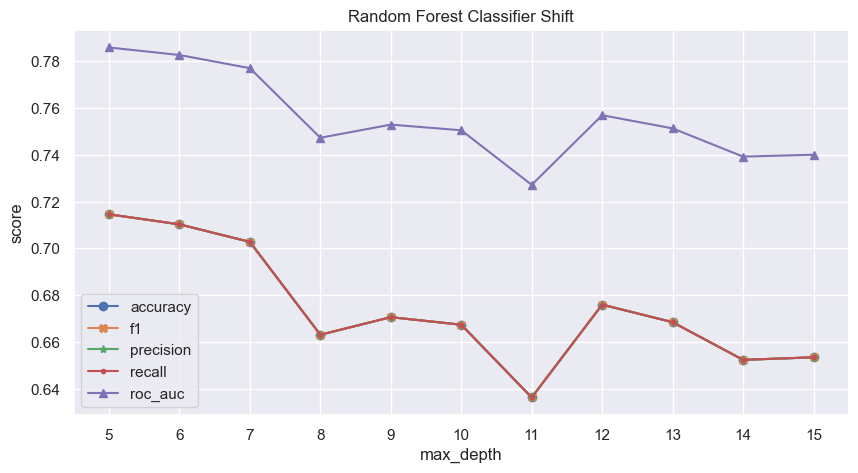

In [191]:
# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(rf_shift_check_result['max_depth'], rf_shift_check_result['accuracy'], label='accuracy',marker='o')
plt.plot(rf_shift_check_result['max_depth'], rf_shift_check_result['f1'], label='f1',marker='X')
plt.plot(rf_shift_check_result['max_depth'], rf_shift_check_result['precision'], label='precision',marker='*')
plt.plot(rf_shift_check_result['max_depth'], rf_shift_check_result['recall'], label='recall',marker='.')
plt.plot(rf_shift_check_result['max_depth'], rf_shift_check_result['roc_auc'], label='roc_auc',marker='^')
plt.legend(['accuracy', 'f1','precision','recall','roc_auc'])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Random Forest Classifier Shift')
plt.xticks(range(5,16))
plt.show()

#### Score Evaluation

In [192]:
# make prediction on the test set
rf_y_pred_shift = best_model_clf.predict(x_test)

In [193]:
# calculate the accuracy score, f1 score, precision score, recall score, roc_auc score
print('Accuracy Score: ', accuracy_score(y_test_shift, rf_y_pred_shift))
print('F1 Score: ', f1_score(y_test_shift, rf_y_pred_shift, average='micro'))
print('Precision Score: ', precision_score(y_test_shift, rf_y_pred_shift, average='micro'))
print('Recall Score: ', recall_score(y_test_shift, rf_y_pred_shift, average='micro'))
print('ROC AUC Score: ', roc_auc_score(y_test_shift, rf_y_pred_shift, average='micro',multi_class='ovr'))

Accuracy Score:  0.49122807017543857
F1 Score:  0.49122807017543857
Precision Score:  0.49122807017543857
Recall Score:  0.49122807017543857
ROC AUC Score:  0.6184210526315789


#### Confusion Matrix

TN for Shift 1: 5
FP for Shift 1: 197
FN for Shift 1: 5
TP for Shift 1: 192

TN for Shift 2: 307
FP for Shift 2: 6
FN for Shift 2: 82
TP for Shift 2: 4

TN for Shift 3: 283
FP for Shift 3: 0
FN for Shift 3: 116
TP for Shift 3: 0



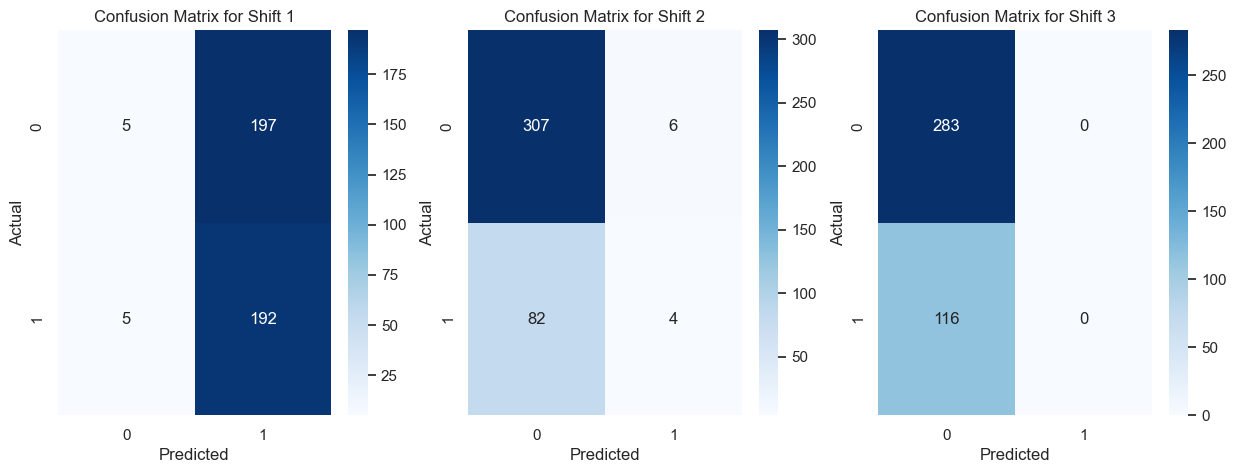

In [124]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# multilabel confusion matrix
rf_cm = multilabel_confusion_matrix(y_test_shift, rf_y_pred_shift>=0.5)

# get the number of labels
num_labels = rf_cm.shape[0]

# print tn, fp, fn, tp for each label
for label_idx in range(num_labels):
    print(f'TN for Shift {label_idx + 1}: {rf_cm[label_idx][0][0]}')
    print(f'FP for Shift {label_idx + 1}: {rf_cm[label_idx][0][1]}')
    print(f'FN for Shift {label_idx + 1}: {rf_cm[label_idx][1][0]}')
    print(f'TP for Shift {label_idx + 1}: {rf_cm[label_idx][1][1]}')
    print('')

# create a single figure with multiple subplots arranged in a row
fig, axes = plt.subplots(1, num_labels, figsize=(num_labels*5, 5))

# plot the confusion matrix for each label
for label_idx in range(num_labels):
    sns.heatmap(rf_cm[label_idx], annot=True, fmt='d', cmap='Blues', ax=axes[label_idx])
    axes[label_idx].set_title(f'Confusion Matrix for Shift {label_idx + 1}')
    axes[label_idx].set_xlabel('Predicted')
    axes[label_idx].set_ylabel('Actual')

plt.show()


Based on the confusion matrices for the three shifts, we can draw the following conclusions:

Shift 1:

The model has a high number of true positives (191) and true negatives (3), indicating that it is accurately identifying both positive and negative cases to some extent.
However, there is a high number of false positives (199), suggesting that the model is overly sensitive and prone to Type I errors (incorrectly predicting positive cases when they are actually negative).
The number of false negatives (6) is relatively low, which is a good sign, but there is room for improvement.
Shift 2:

The model has a high number of true negatives (307), indicating that it is accurately identifying negative cases.
However, the number of true positives (3) is very low, which means the model is struggling to identify positive cases.
The number of false positives (6) is relatively low, which is good, but the high number of false negatives (83) indicates that the model is not sensitive enough and has a high Type II error rate (incorrectly predicting negative cases when they are actually positive).
Shift 3:

The model has a high number of true negatives (283), showing that it is accurately identifying negative cases.
However, the model fails to identify any true positives (0), indicating poor performance in detecting positive cases.
The absence of false positives (0) is good, but the high number of false negatives (116) indicates that the model is not sensitive enough and has a high Type II error rate.
In conclusion, while each model performs well in some aspects, there are significant areas for improvement. Shift 1's model has a high Type I error rate, while Shifts 2 and 3 have high Type II error rates. To improve the performance of these models, additional tuning, feature engineering, or alternative algorithms could be explored. The goal should be to increase the number of true positives and true negatives while minimizing false positives and false negatives, thus achieving a better balance between sensitivity and specificity.

## Decision Tree

### Decision Tree Regressor

In [125]:
# import sklearn decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [126]:
dt_param_grid = { # parameters to tune
    'max_depth': [10, 20, 30, 40, 50,1000],# maximum depth of the tree
    'min_samples_leaf': [5,10,15,20], # minimum number of samples required to be at a leaf node
    'criterion': ['squared_error'], # function to measure the quality of a split
    'splitter': ['best'], # strategy used to choose the split at each node
    'max_leaf_nodes': [ 5, 10, 20], # grow a tree with max_leaf_nodes in best-first fashion
    'min_impurity_decrease': [0.0, 0.1, 0.2], # a node will be split if this split induces a decrease of the impurity greater than or equal to this value
    'ccp_alpha': [0.0, 0.1, 0.2], # complexity parameter used for Minimal Cost-Complexity Pruning
}

In [127]:
dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),  # model
                              dt_param_grid,  # parameters to tune
                              cv=5, # cross-validation
                              verbose= 0, # verbose set to 0 to not print out the progress
                              scoring='neg_mean_squared_error', # scoring metric
                              )

In [128]:
# fit the grid search
dt_grid_search.fit(x_train, y_train_location)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2],
                         'criterion': ['squared_error'],
                         'max_depth': [10, 20, 30, 40, 50, 1000],
                         'max_leaf_nodes': [5, 10, 20],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'splitter': ['best']},
             scoring='neg_mean_squared_error')

In [129]:
# print the best parameters and score
dt_grid_search.best_params_, dt_grid_search.best_score_

({'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': 10,
  'max_leaf_nodes': 5,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 5,
  'splitter': 'best'},
 -9.823997553074006e-05)

In [130]:
# 'ccp_alpha': 0.0,
#   'criterion': 'squared_error',
#   'max_depth': 10,
#   'max_leaf_nodes': 5,
#   'min_impurity_decrease': 0.0,
#   'min_samples_leaf': 5,
#   'splitter': 'best'},

dt_location_check_result = pd.DataFrame(columns=['max_depth', 'neg_mean_squared_error','neg_mean_absolute_error'])
for i in range(10,21):
    dt_check = DecisionTreeRegressor(
                                     ccp_alpha= 0.0,
                                     criterion= 'squared_error',
                                     max_depth= i,
                                     max_leaf_nodes= 5,
                                     min_impurity_decrease= 0.0,
                                     min_samples_leaf= 5,
                                     splitter= 'best',
                                     random_state=42
                                    )
    dt_check.fit(x_train, y_train_location)
    y_pred_location_check = dt_check.predict(x_train_original)
    
    # calculate scores
    mae = mean_absolute_error(y_train_location, y_pred_location_check)
    mse = mean_squared_error(y_train_location, y_pred_location_check)
    
    # append the scores to the dataframe
    dt_location_check_result = pd.concat([dt_location_check_result, pd.DataFrame([[i, mse, mae]], columns=['max_depth', 
                                                                                                           'neg_mean_squared_error',
                                                                                                           'neg_mean_absolute_error' ])], axis=0)
    
dt_location_check_result

,max_depth,neg_mean_squared_error,neg_mean_absolute_error
0,10,0.000108,0.007107
0,11,0.000108,0.007107
0,12,0.000108,0.007107
0,13,0.000108,0.007107
0,14,0.000108,0.007107
0,15,0.000108,0.007107
0,16,0.000108,0.007107
0,17,0.000108,0.007107
0,18,0.000108,0.007107
0,19,0.000108,0.007107


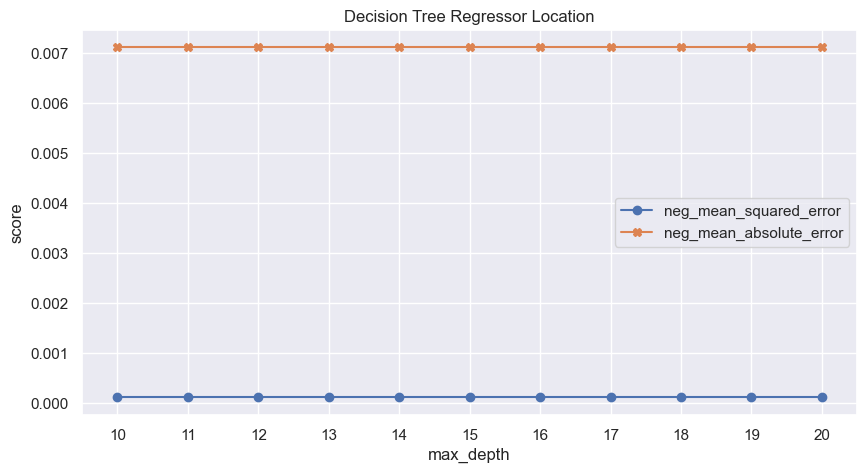

In [131]:
# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(dt_location_check_result['max_depth'], dt_location_check_result['neg_mean_squared_error'], label='neg_mean_squared_error',marker='o')
plt.plot(dt_location_check_result['max_depth'], dt_location_check_result['neg_mean_absolute_error'], label='neg_mean_absolute_error',marker='X')
plt.legend(['neg_mean_squared_error', 'neg_mean_absolute_error'])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Decision Tree Regressor Location')
plt.xticks(range(10,21))
plt.show()

Make a prediction on the test data

In [132]:
dt_regression_best_model = dt_grid_search.best_estimator_

In [133]:
# make prediction on the test set and train set
dt_y_pred_location = dt_regression_best_model.predict(x_test)
dt_y_train_location = dt_regression_best_model.predict(x_train)

In [134]:
# calculate the mean absolute error and mean squared error
mae = mean_absolute_error(y_test_location, dt_y_pred_location)
mse = mean_squared_error(y_test_location, dt_y_pred_location)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)

Mean Squared Error:  7.06322366246349e-05
Mean Absolute Error:  0.005931992475830806


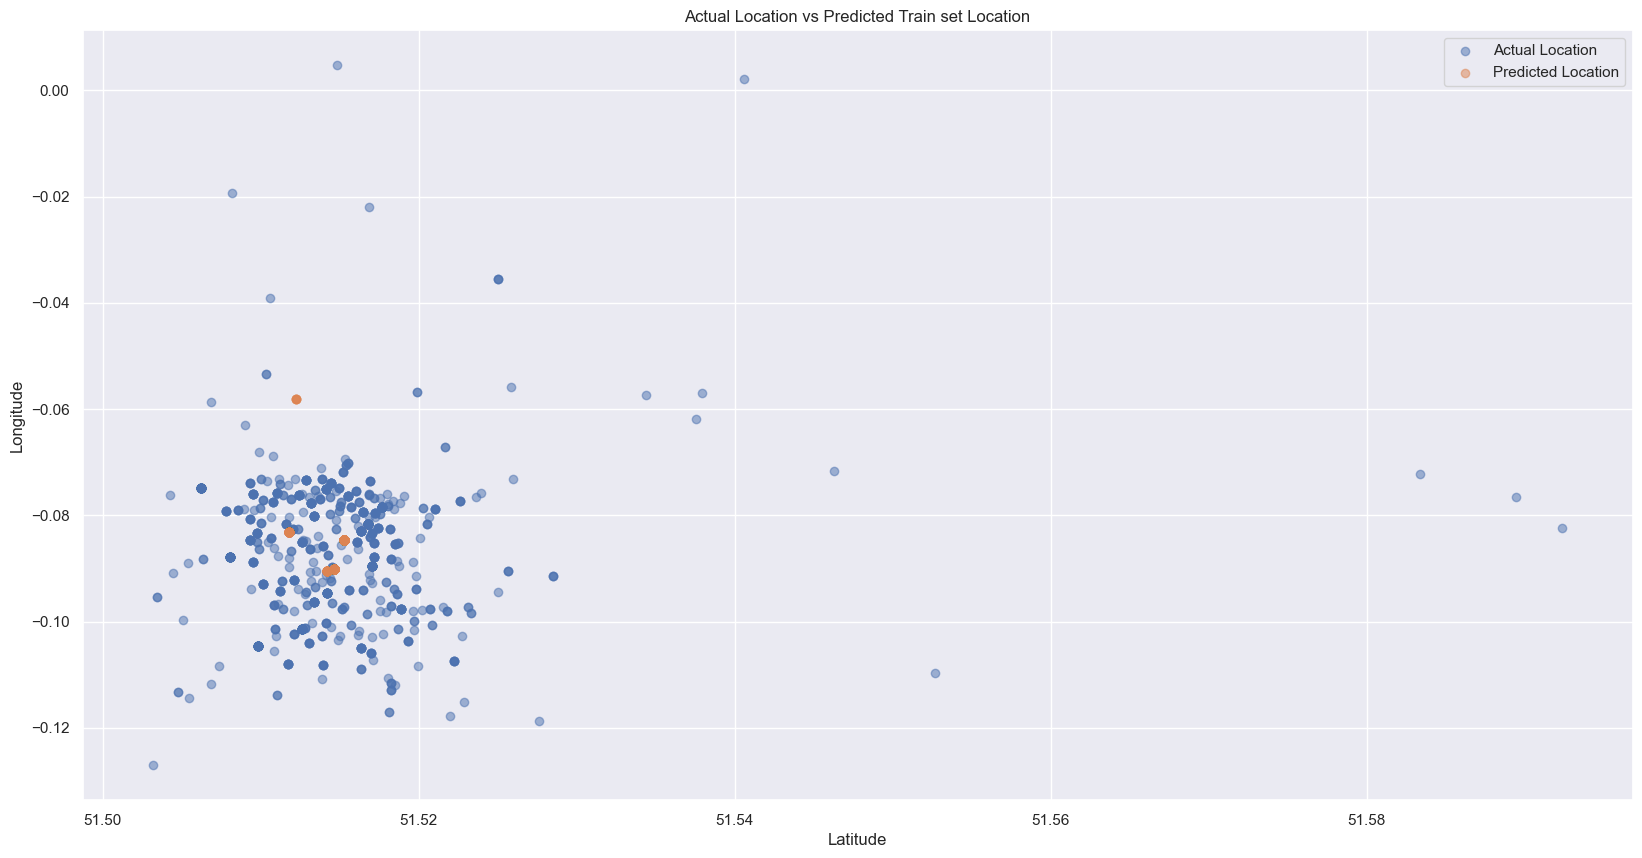

In [135]:
# Scatter plot 2d 
plt.figure(figsize=(20,10)) # set the size of the figure 
plt.scatter(x_train_original['Latitude'], x_train_original['Longitude'], label='Actual Location', alpha=0.5) # plot the actual train location
plt.scatter(dt_y_train_location[:,0], dt_y_train_location[:,1], label='Predicted Location', alpha=0.5) # plot the predicted location
plt.legend()
plt.title('Actual Location vs Predicted Train set Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

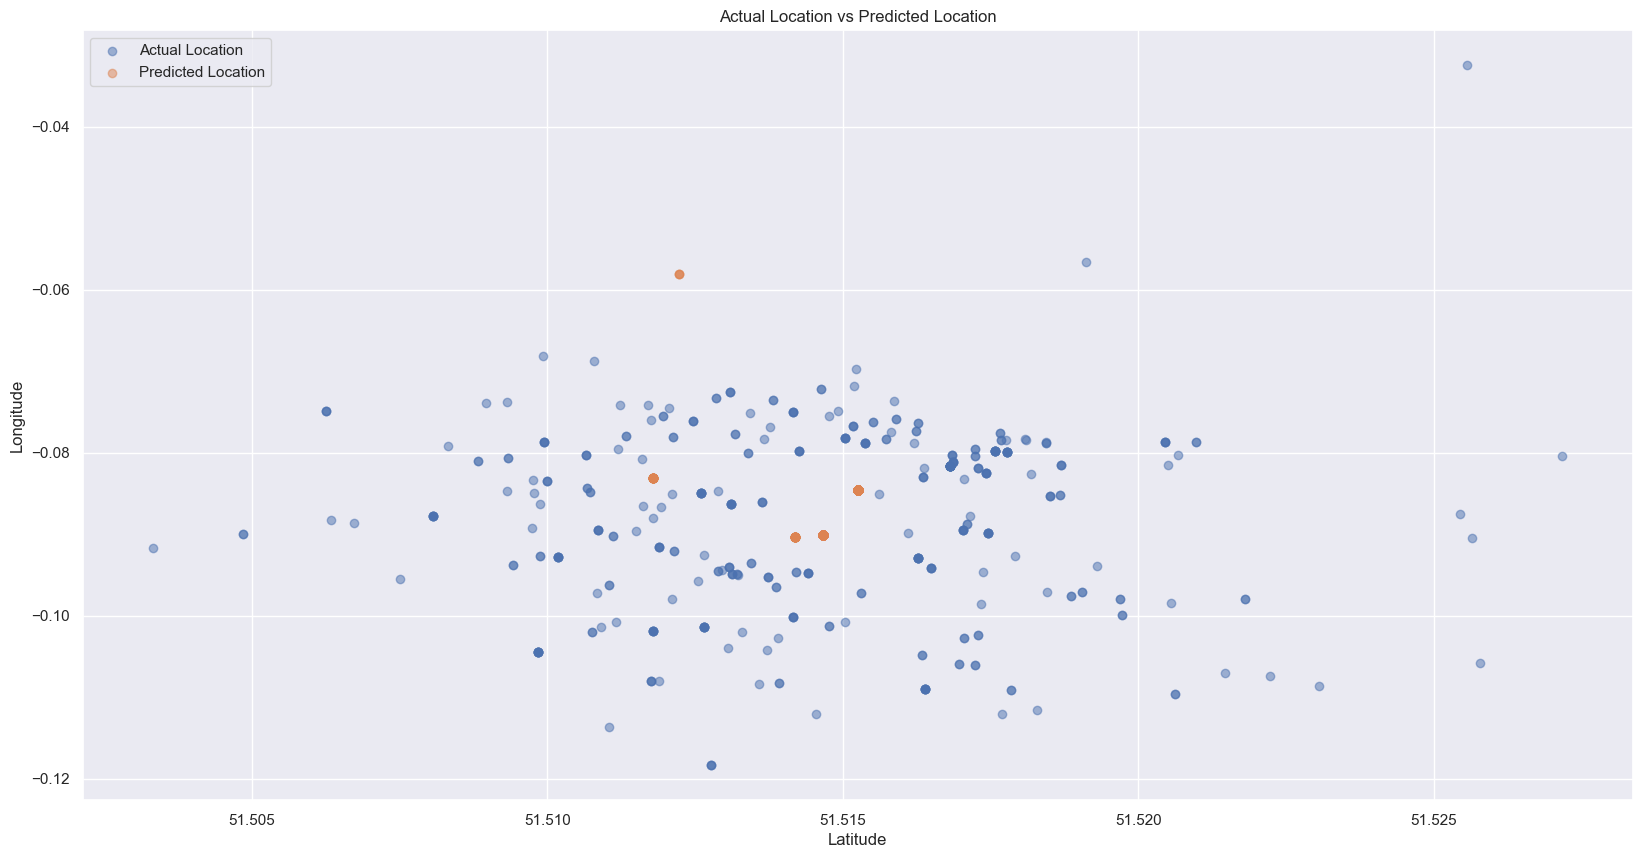

In [136]:
# Scatter plot 2d
plt.figure(figsize=(20,10))
plt.scatter(y_test_location['Latitude'], y_test_location['Longitude'], label='Actual Location', alpha=0.5)
plt.scatter(dt_y_pred_location[:,0], dt_y_pred_location[:,1], label='Predicted Location', alpha=0.5)
plt.legend()
plt.title('Actual Location vs Predicted Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

##### Error Distances

In [137]:
# calculate the actual distance between the predicted and the correct location 
from geopy.distance import geodesic
dt_distance = []
for i in range(len(dt_y_pred_location)):
    dt_distance.append(geodesic((dt_y_pred_location[i][0], dt_y_pred_location[i][1]), 
                             (y_test_location.iloc[i][0], y_test_location.iloc[i][1])).meters)

# convert to df
dt_distance = pd.DataFrame(dt_distance, columns=['distance'])

dt_distance.describe()

,distance
count,399.000000
mean,755.853465
std,458.936023
min,165.729455
25%,416.391322
50%,675.384866
75%,909.731410
max,3867.942392


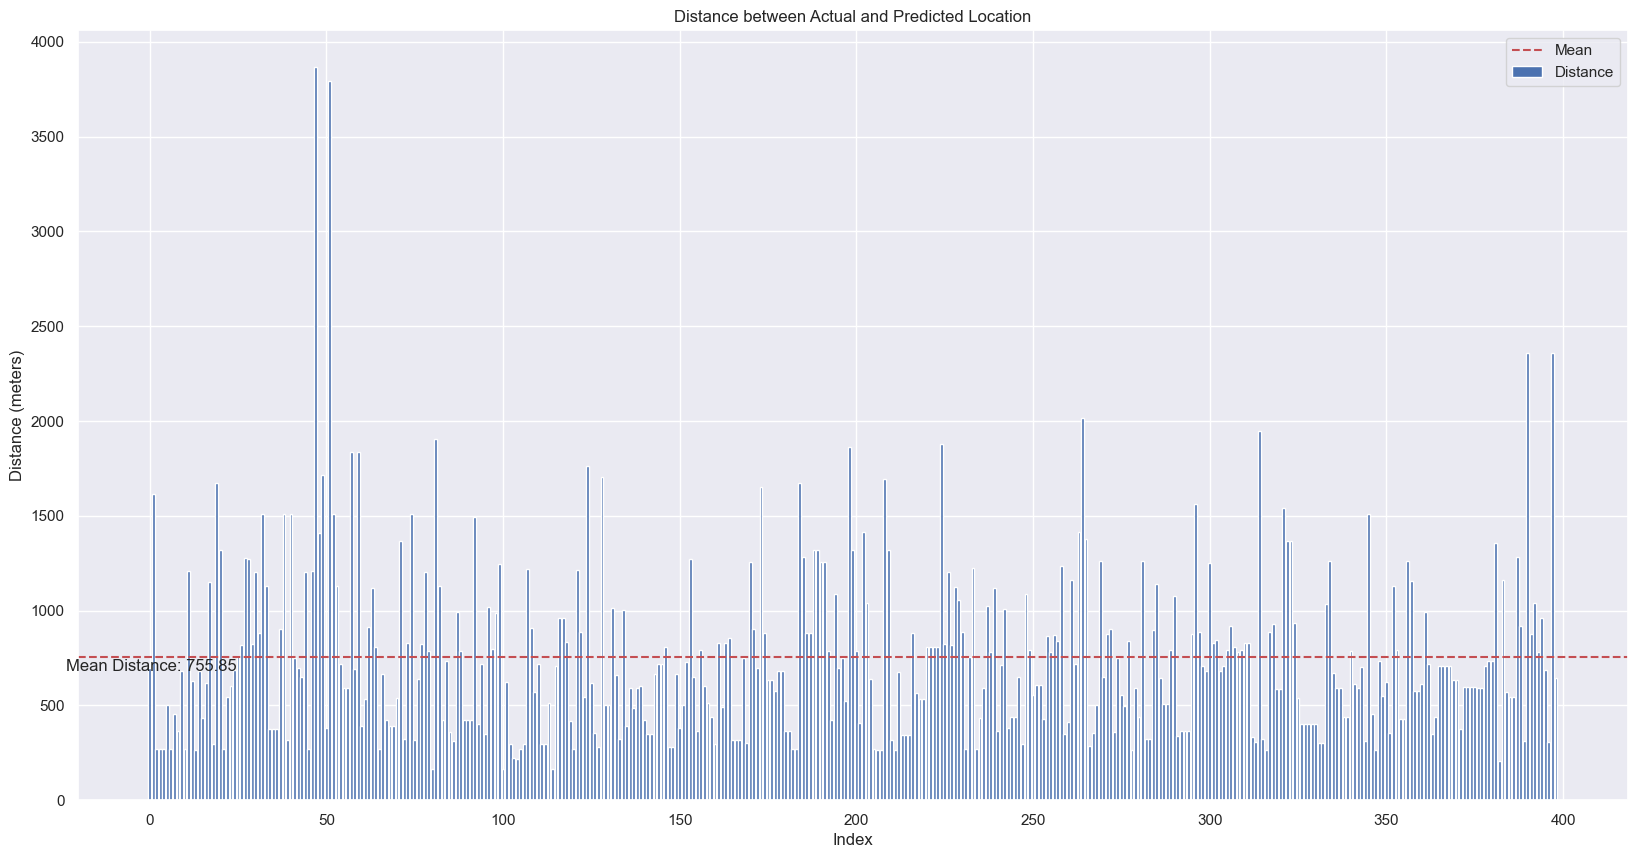

In [138]:
# plot the distance and a mean line, with value and legend
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(dt_distance.index, dt_distance['distance'], label='Distance')
plt.axhline(dt_distance['distance'].mean(), color='r', linestyle='--', label='Mean')
plt.legend()
plt.title('Distance between Actual and Predicted Location')
plt.xlabel('Index')
plt.ylabel('Distance (meters)')
plt.text(0.5,0.9*dt_distance['distance'].mean(), f'Mean Distance: {dt_distance["distance"].mean():.2f}', ha='center')
plt.show()

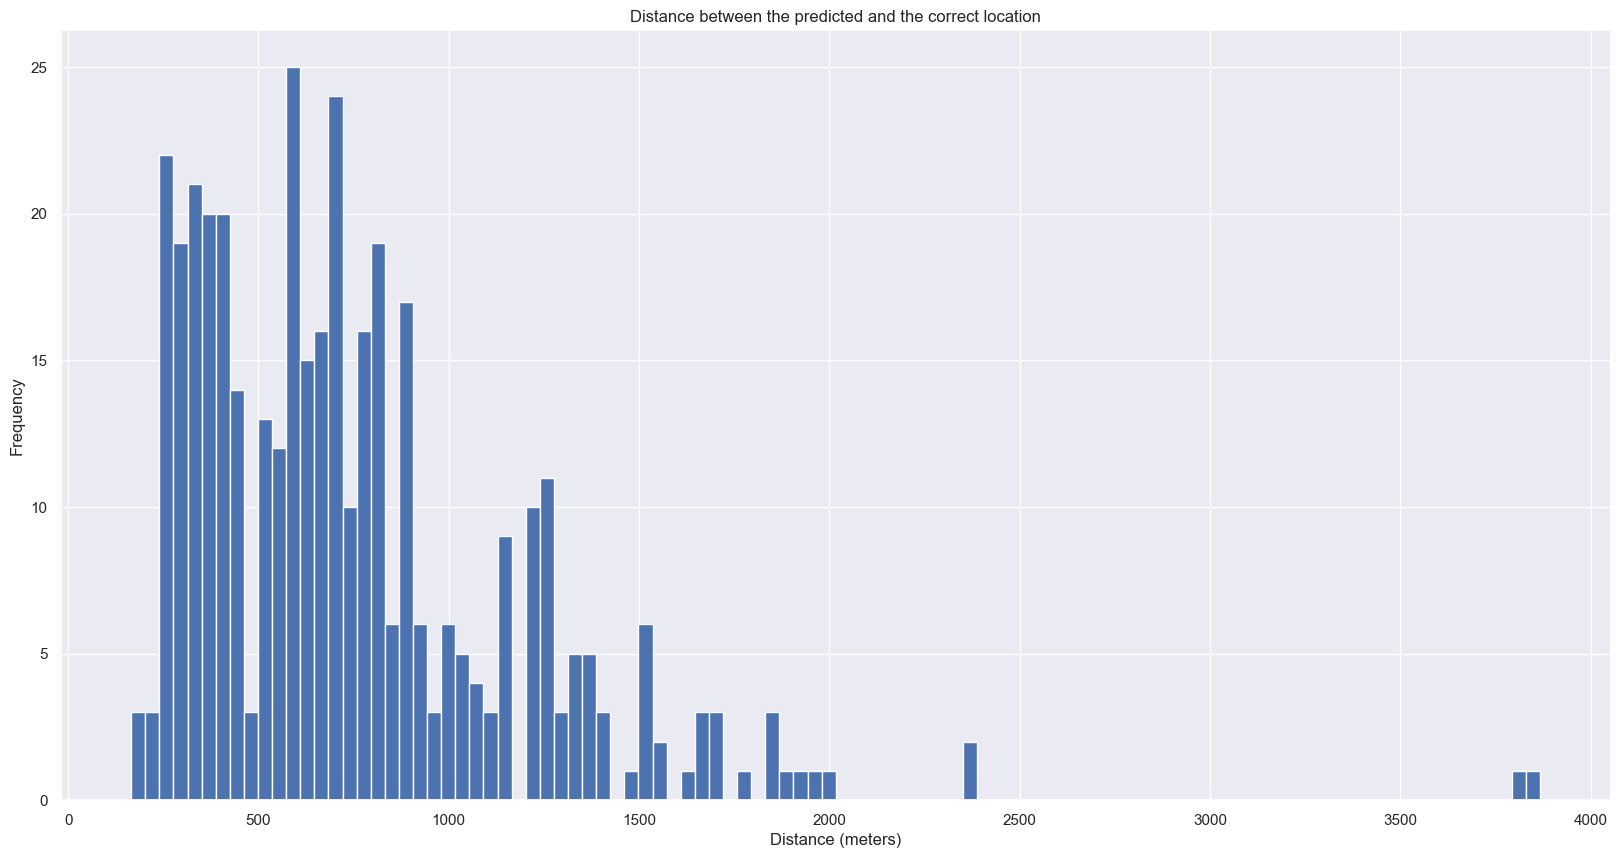

In [139]:
# histogram of the distance error
plt.figure(figsize=(20,10))
plt.hist(dt_distance['distance'], bins=100)
plt.title('Distance between the predicted and the correct location')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.show()

### Decision Tree Classifier

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [141]:
dt_classifier_param_grid = {
    'criterion': ['gini'], # the function to measure the quality of a split
    "max_depth": [ 5, 10,15,20,1000], # the maximum depth of the tree
    "min_samples_split": [2, 5, 10,100], # the minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 3, 5,100], # the minimum number of samples required to be at a leaf node
}

In [142]:
dt_classifier_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                    dt_classifier_param_grid,
                                    cv=5,
                                    scoring='roc_auc',
                                    verbose=0)

In [143]:
# fit the grid search
dt_classifier_search.fit(x_train, y_train_shift)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 10, 15, 20, 1000],
                         'min_samples_leaf': [1, 3, 5, 100],
                         'min_samples_split': [2, 5, 10, 100]},
             scoring='roc_auc')

In [144]:
# print the best parameters and score
dt_classifier_search.best_params_, dt_classifier_search.best_score_

({'criterion': 'gini',
  'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 nan)

In [145]:
# ({'criterion': 'gini',
#   'max_depth': 5,
#   'min_samples_leaf': 1,
#   'min_samples_split': 2},
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

dt_classifier_check_result = pd.DataFrame(columns=['max_depth', 'accuracy','f1_score','precision_score','recall_score','roc_auc_score'])
for i in range(5,16):
    dt_check = DecisionTreeClassifier(criterion= 'gini',
                                        max_depth= i,
                                        min_samples_leaf= 1,
                                        min_samples_split= 2,
                                        random_state=42
                                        )
    dt_check.fit(x_train, y_train_shift)
    y_pred_shift_check = dt_check.predict(x_train_original)

    # calculate scores
    accuracy = accuracy_score(y_train_shift, y_pred_shift_check)
    f1 = f1_score(y_train_shift, y_pred_shift_check, average='micro')
    precision = precision_score(y_train_shift, y_pred_shift_check, average='micro')
    recall = recall_score(y_train_shift, y_pred_shift_check, average='micro')
    roc_auc = roc_auc_score(y_train_shift, y_pred_shift_check, average='micro',multi_class='ovr')

    # append the scores to the dataframe
    dt_classifier_check_result = pd.concat([dt_classifier_check_result, pd.DataFrame([[i, accuracy, f1, precision, recall, roc_auc]], columns=['max_depth',
                                                                                                              'accuracy',
                                                                                                                'f1_score',
                                                                                                                'precision_score',
                                                                                                                'recall_score',
                                                                                                                'roc_auc_score' ])], axis=0)

dt_classifier_check_result

,max_depth,accuracy,f1_score,precision_score,recall_score,roc_auc_score
0,5,0.600858,0.613027,0.625698,0.600858,0.710569
0,6,0.604077,0.610629,0.617325,0.604077,0.708423
0,7,0.611588,0.614887,0.618221,0.611588,0.711373
0,8,0.596567,0.608981,0.621924,0.596567,0.707618
0,9,0.597639,0.603140,0.608743,0.597639,0.702790
0,10,0.395923,0.404162,0.412752,0.395923,0.557135
0,11,0.387339,0.399116,0.411631,0.387339,0.555258
0,12,0.407725,0.412371,0.417124,0.407725,0.561427
0,13,0.405579,0.413793,0.422346,0.405579,0.564109
0,14,0.390558,0.403101,0.416476,0.390558,0.558476


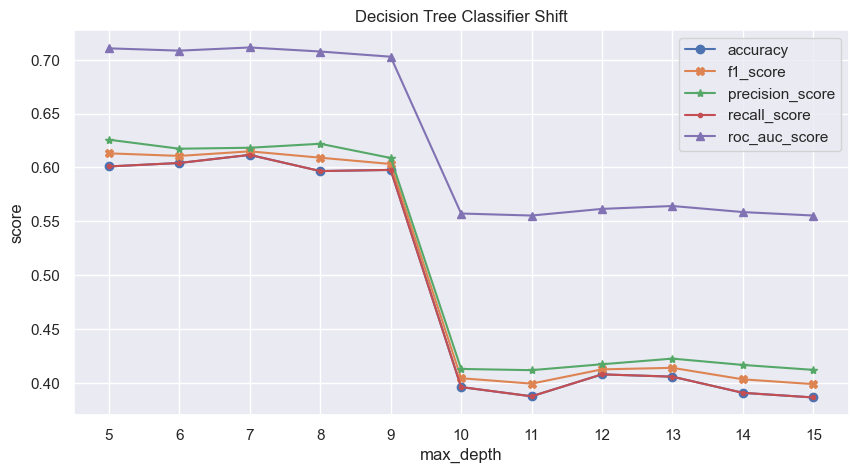

In [146]:
# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(dt_classifier_check_result['max_depth'], dt_classifier_check_result['accuracy'], label='accuracy',marker='o')
plt.plot(dt_classifier_check_result['max_depth'], dt_classifier_check_result['f1_score'], label='f1_score',marker='X')
plt.plot(dt_classifier_check_result['max_depth'], dt_classifier_check_result['precision_score'], label='precision_score',marker='*')
plt.plot(dt_classifier_check_result['max_depth'], dt_classifier_check_result['recall_score'], label='recall_score',marker='.')
plt.plot(dt_classifier_check_result['max_depth'], dt_classifier_check_result['roc_auc_score'], label='roc_auc_score',marker='^')
plt.legend(['accuracy', 'f1_score','precision_score','recall_score','roc_auc_score'])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Decision Tree Classifier Shift')
plt.xticks(range(5,16))
plt.show()

#### Score Evaluation

In [147]:
dt_y_pred_shift = dt_classifier_search.predict(x_test)

In [148]:
# calculate the accuracy score, f1 score, precision score, recall score, roc_auc score
print('Accuracy Score: ', accuracy_score(y_test_shift, dt_y_pred_shift))
print('F1 Score: ', f1_score(y_test_shift, dt_y_pred_shift, average='micro'))
print('Precision Score: ', precision_score(y_test_shift, dt_y_pred_shift, average='micro'))
print('Recall Score: ', recall_score(y_test_shift, dt_y_pred_shift, average='micro'))
print('ROC AUC Score: ', roc_auc_score(y_test_shift, dt_y_pred_shift, average='micro',multi_class='ovr'))

Accuracy Score:  0.49373433583959897
F1 Score:  0.49497487437185933
Precision Score:  0.49622166246851385
Recall Score:  0.49373433583959897
ROC AUC Score:  0.6215538847117794


#### Confusion Matrix

TN for Shift 1: 22
FP for Shift 1: 180
FN for Shift 1: 12
TP for Shift 1: 185

TN for Shift 2: 293
FP for Shift 2: 20
FN for Shift 2: 74
TP for Shift 2: 12

TN for Shift 3: 283
FP for Shift 3: 0
FN for Shift 3: 116
TP for Shift 3: 0



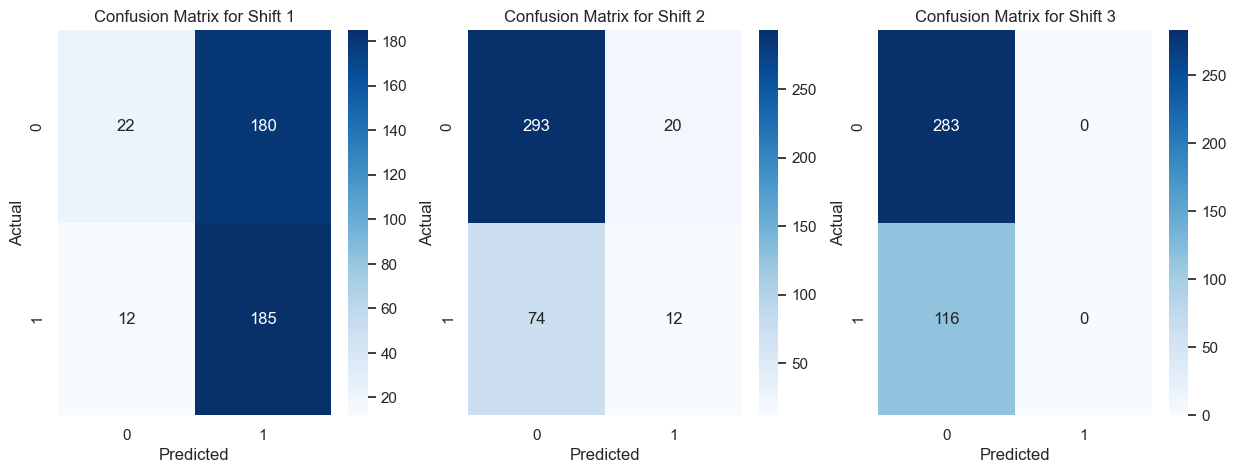

In [149]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# multilabel confusion matrix
dt_cm = multilabel_confusion_matrix(y_test_shift, dt_y_pred_shift>=0.5)

# get the number of labels
num_labels = dt_cm.shape[0]

# print tn, fp, fn, tp for each label
for label_idx in range(num_labels):
    print(f'TN for Shift {label_idx + 1}: {dt_cm[label_idx][0][0]}')
    print(f'FP for Shift {label_idx + 1}: {dt_cm[label_idx][0][1]}')
    print(f'FN for Shift {label_idx + 1}: {dt_cm[label_idx][1][0]}')
    print(f'TP for Shift {label_idx + 1}: {dt_cm[label_idx][1][1]}')
    print('')

# create a single figure with multiple subplots arranged in a row
fig, axes = plt.subplots(1, num_labels, figsize=(num_labels*5, 5))

# plot the confusion matrix for each label
for label_idx in range(num_labels):
    sns.heatmap(dt_cm[label_idx], annot=True, fmt='d', cmap='Blues', ax=axes[label_idx])
    axes[label_idx].set_title(f'Confusion Matrix for Shift {label_idx + 1}')
    axes[label_idx].set_xlabel('Predicted')
    axes[label_idx].set_ylabel('Actual')

plt.show()

## Neual Network

### Neual Network Regressor

In [150]:
import tensorflow as tf
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.layers import Dense, Input,Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [151]:
nn_reg = MLPRegressor(max_iter=500,random_state=42)

In [152]:
# Define the parameter grid to search over
nn_reg_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
                     'activation': ['identity', 'logistic', 'tanh', 'relu'],
                     'solver': ['sgd', 'adam'],
                     'early_stopping':[True],
                     'validation_fraction':[0.2],
                     'learning_rate_init':[0.0003],
}

In [153]:
nn_reg_param_grid = GridSearchCV(nn_reg, 
                                 nn_reg_param_grid, 
                                 cv=5, 
                                 scoring='neg_mean_squared_error', 
                                 verbose= 0)


In [154]:
# fit
nn_reg_param_grid.fit(x_train, y_train_location)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=500, random_state=42),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50, 25)],
                         'learning_rate_init': [0.0003],
                         'solver': ['sgd', 'adam'],
                         'validation_fraction': [0.2]},
             scoring='neg_mean_squared_error')

In [155]:
# best parameters and results
nn_reg_param_grid.best_params_, nn_reg_param_grid.best_score_

({'activation': 'identity',
  'early_stopping': True,
  'hidden_layer_sizes': (100, 50, 25),
  'learning_rate_init': 0.0003,
  'solver': 'sgd',
  'validation_fraction': 0.2},
 -0.0010195271167925293)

In [156]:
# ({'activation': 'identity',
#   'early_stopping': True,
#   'hidden_layer_sizes': (100, 50, 25),
#   'learning_rate_init': 0.0003,
#   'solver': 'sgd',
#   'validation_fraction': 0.2},
nn_reg_param_grid_result = pd.DataFrame(columns=['activation',
                                                 'neg_mean_squared_error',
                                                 'neg_mean_absolute_error'])
activations = ['identity', 'logistic', 'tanh', 'relu']

for act in activations:
    nn_reg = MLPRegressor(max_iter=500,
                           random_state=42,
                           activation=act,
                           early_stopping=True,
                           hidden_layer_sizes=(100, 50, 25),
                           learning_rate_init=0.0003,
                           solver='sgd',
                           validation_fraction=0.2)
    
    nn_reg.fit(x_train, y_train_location)
    y_pred_train_location = nn_reg.predict(x_train_original)

    mse = mean_squared_error(y_train_location, y_pred_train_location)
    mae = mean_absolute_error(y_train_location, y_pred_train_location)

    nn_reg_param_grid_result = pd.concat([nn_reg_param_grid_result, 
                                          pd.DataFrame([[act, mse, mae]], 
                                          columns=['activation',
                                                   'neg_mean_squared_error',
                                                   'neg_mean_absolute_error' ])], axis=0)
    
nn_reg_param_grid_result

,activation,neg_mean_squared_error,neg_mean_absolute_error
0,identity,2.256975,1.474179
0,logistic,0.001021,0.026251
0,tanh,0.369319,0.447951
0,relu,22303.868255,107.360519


Logistic activation has out performed the other activation functions, so I will use logistic activation instead of identity activation.

Make a prediction on the test data

In [157]:
nn_reg_best = MLPRegressor(max_iter=500, 
                           random_state=42, 
                           activation='logistic', 
                           early_stopping=True, 
                           hidden_layer_sizes=(100, 50, 25), 
                           learning_rate_init=0.0003, 
                           solver='sgd', 
                           validation_fraction=0.2)

In [158]:
nn_reg_best_history=nn_reg_best.fit(x_train, y_train_location)

In [159]:
nn_y_pred_train_location = nn_reg_best.predict(x_train_original)
nn_y_pred_test_location = nn_reg_best.predict(x_test)

In [160]:
# Evaluate the model using the mean squared error metric
regression_mse = mean_squared_error(y_test_location,nn_y_pred_test_location)
print(f"Location regression mean squared error: {regression_mse}")

regression_mae = mean_absolute_error(y_test_location, nn_y_pred_test_location)
print(f"Location regression mean absolute error: {regression_mae}")

Location regression mean squared error: 7.523000988983618e-05
Location regression mean absolute error: 0.006406025511003357


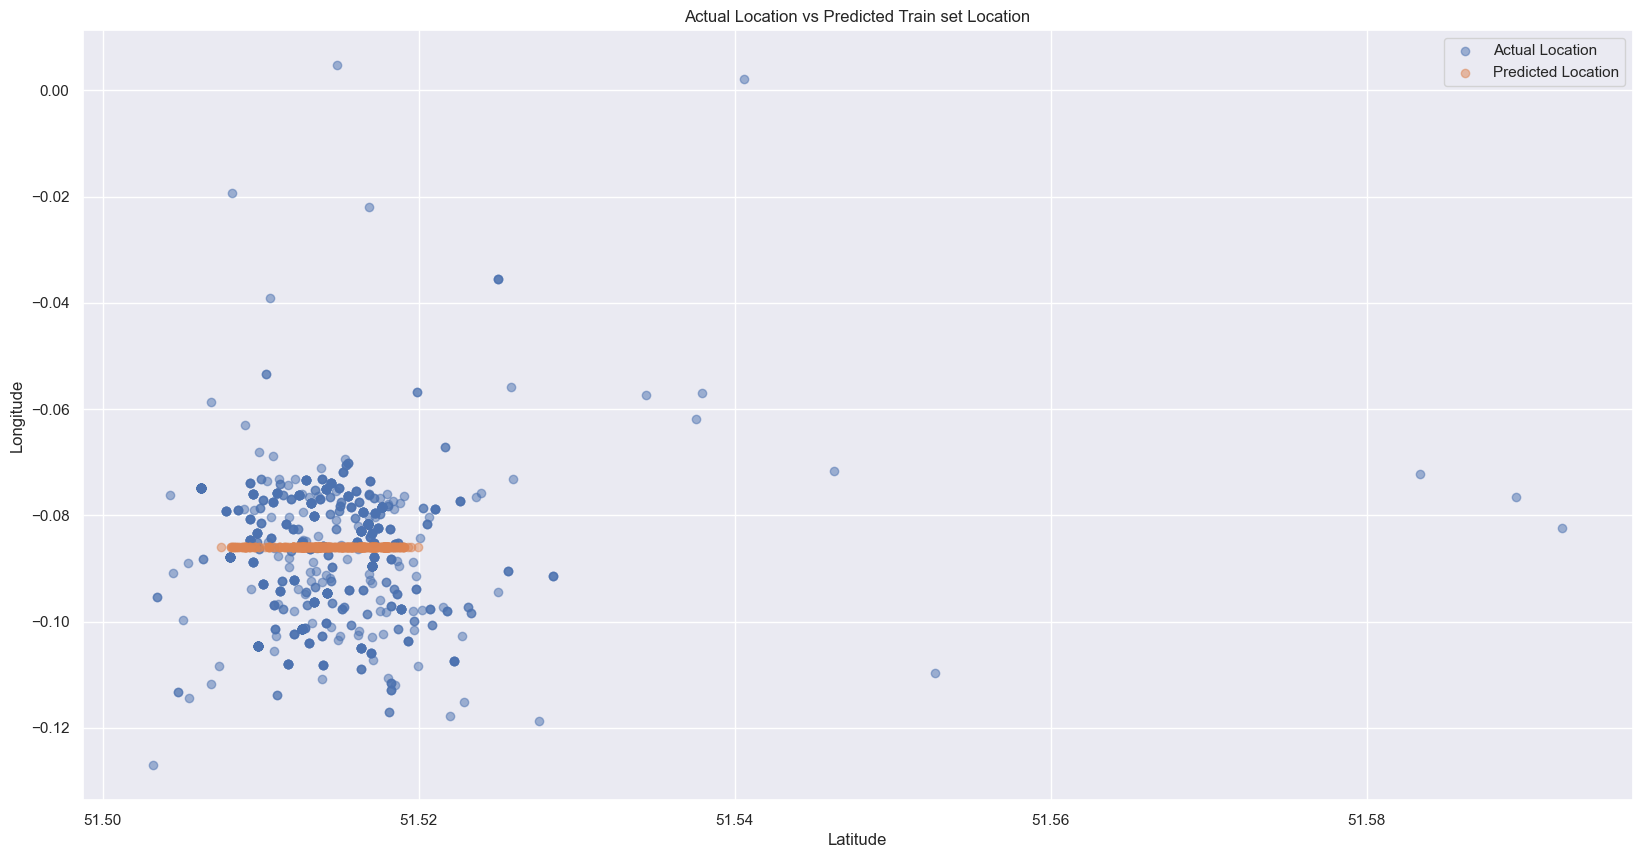

In [161]:
# Scatter plot 2d 
plt.figure(figsize=(20,10)) # set the size of the figure 
plt.scatter(x_train_original['Latitude'], x_train_original['Longitude'], label='Actual Location', alpha=0.5) # plot the actual train location
plt.scatter(nn_y_pred_test_location[:,0], nn_y_pred_test_location[:,1], label='Predicted Location', alpha=0.5) # plot the predicted location
plt.legend()
plt.title('Actual Location vs Predicted Train set Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

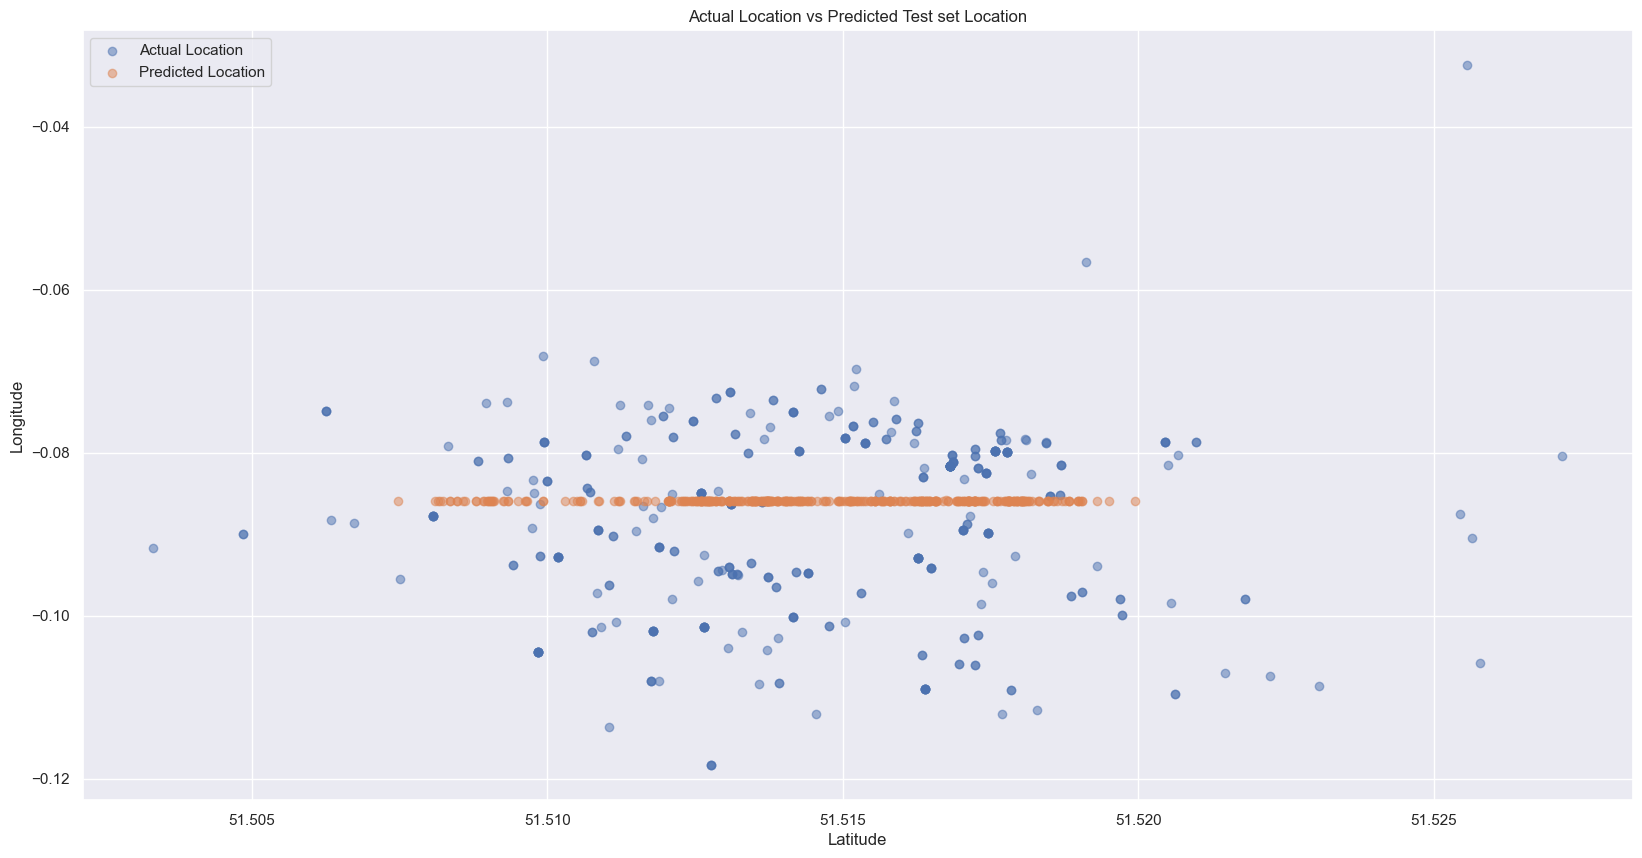

In [162]:
# Scatter plot 2d 
plt.figure(figsize=(20,10)) # set the size of the figure
plt.scatter(x_test_original['Latitude'], x_test_original['Longitude'], label='Actual Location', alpha=0.5) # plot the actual test location
plt.scatter(nn_y_pred_test_location[:,0], nn_y_pred_test_location[:,1], label='Predicted Location', alpha=0.5) # plot the predicted location
plt.legend() 
plt.title('Actual Location vs Predicted Test set Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

##### Error Distances

In [163]:
# calculate the actual distance between the predicted and the correct location 
from geopy.distance import geodesic
distance = []
for i in range(len(rf_y_test_location)):
    distance.append(geodesic((nn_y_pred_test_location[i][0], nn_y_pred_test_location[i][1]), 
                             (y_test_location.iloc[i][0], y_test_location.iloc[i][1])).meters)


# convert distance to pd
nn_distance = pd.DataFrame(distance, columns=['Distance'])

nn_distance.describe()

,Distance
count,399.000000
mean,821.894085
std,458.395615
min,26.977315
25%,524.319283
50%,735.770677
75%,1043.408215
max,3940.073304


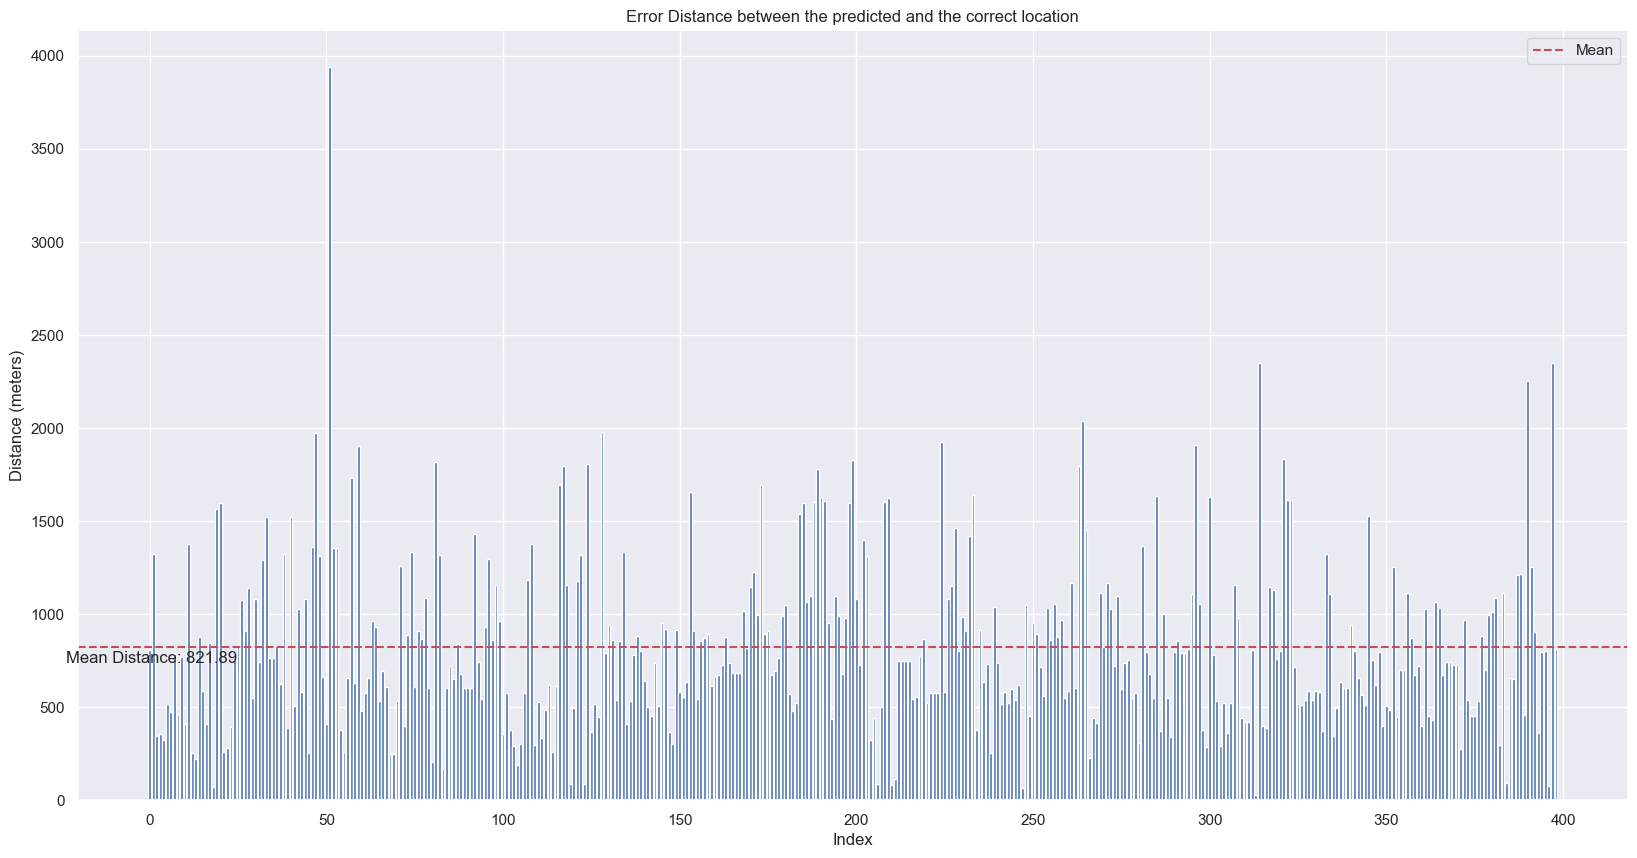

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # set the size of the figure

# plot the actual test location
plt.bar(nn_distance.index, nn_distance['Distance'])

# plot the predicted location
plt.axhline(nn_distance['Distance'].mean(), color='r', linestyle='--', label='Mean')

# add legend
plt.legend()

# add title and labels
plt.title('Error Distance between the predicted and the correct location')
plt.xlabel('Index')
plt.ylabel('Distance (meters)')

# add mean distance text annotation
plt.text(0.5, 0.9*nn_distance['Distance'].mean(), f'Mean Distance: {nn_distance["Distance"].mean():.2f}', ha='center')

plt.show()

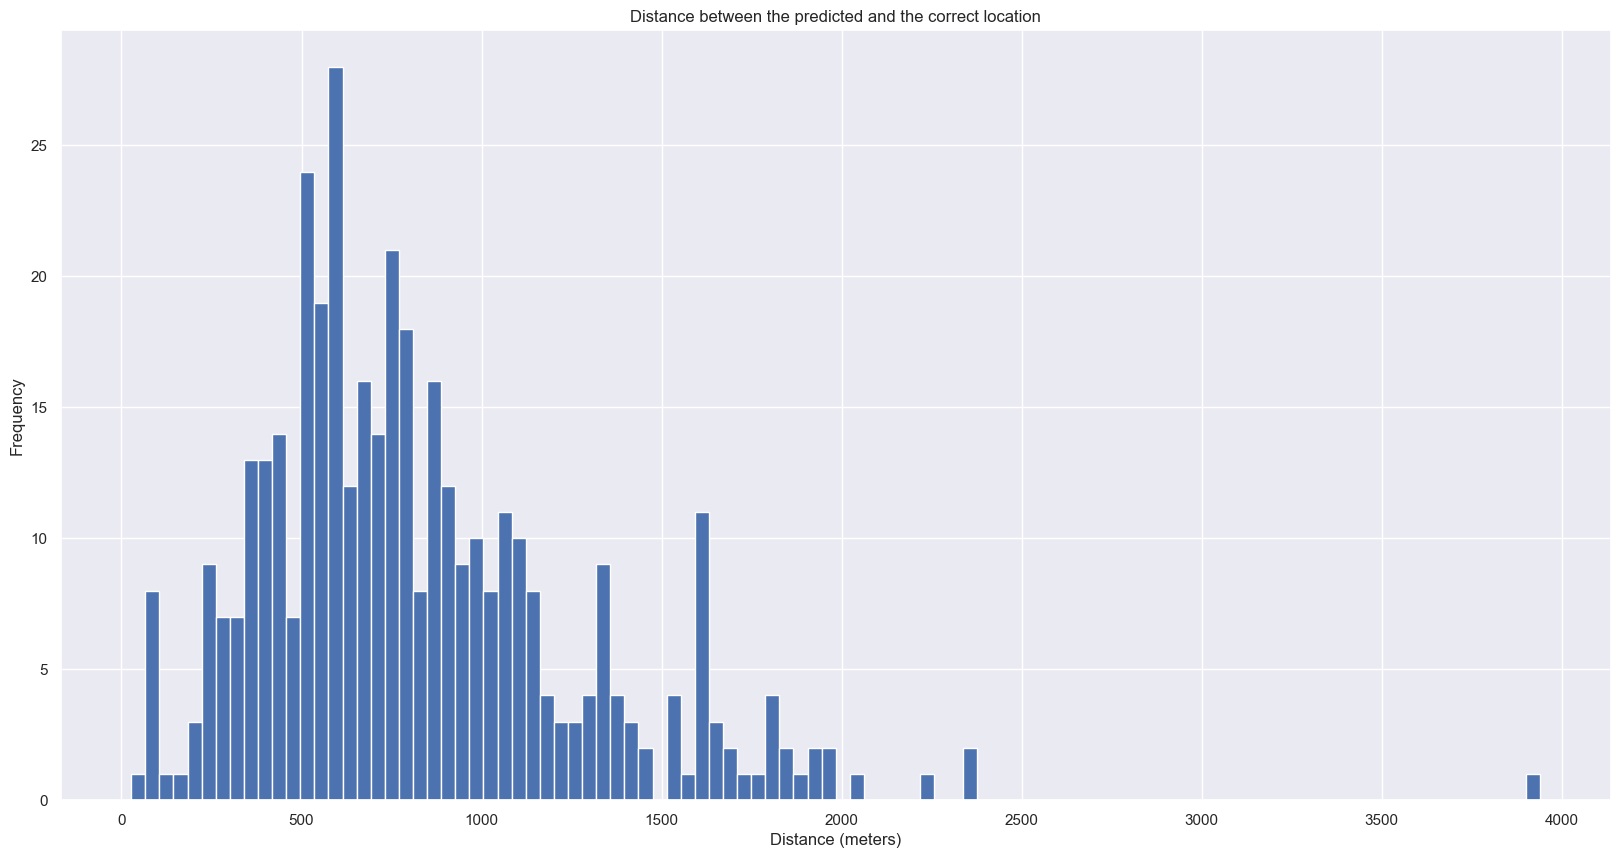

In [165]:
# histogram of the distance error
plt.figure(figsize=(20,10))
plt.hist(nn_distance['Distance'], bins=100)
plt.title('Distance between the predicted and the correct location')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.show()

### Neual Network Classifier

In [166]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [167]:
nn_cf_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
                     'activation': ['identity', 'logistic', 'tanh', 'relu'],
                     'solver': ['sgd', 'adam'],
                     'early_stopping':[True],
                     'validation_fraction':[0.2],
                     'learning_rate_init':[0.0003],

}

In [168]:
mlp = MLPClassifier(random_state=42, max_iter=1000)

In [169]:
nn_cf_grid_search = GridSearchCV(mlp, 
                           nn_cf_param_grid, 
                           cv=5, 
                           scoring='roc_auc', 
                           n_jobs=-1,
                           verbose=0)

In [170]:
nn_cf_grid_search.fit(x_train, y_train_shift)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50, 25)],
                         'learning_rate_init': [0.0003],
                         'solver': ['sgd', 'adam'],
                         'validation_fraction': [0.2]},
             scoring='roc_auc')

In [171]:
nn_cf_grid_search.best_params_, nn_cf_grid_search.best_score_

({'activation': 'identity',
  'early_stopping': True,
  'hidden_layer_sizes': (50,),
  'learning_rate_init': 0.0003,
  'solver': 'sgd',
  'validation_fraction': 0.2},
 nan)

In [172]:
# 'activation': 'identity',
#   'early_stopping': True,
#   'hidden_layer_sizes': (50,),
#   'learning_rate_init': 0.0003,
#   'solver': 'sgd',
#   'validation_fraction': 0.2},
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

nn_shift_check_result = pd.DataFrame(columns=['hidden_layer_sizes', 
                                              'accuracy', 
                                              'f1', 
                                              'precision', 
                                              'recall', 
                                              'roc_auc'])

activations = ['identity', 'logistic', 'tanh', 'relu']

for i in activations:

    nn_check = MLPClassifier(   activation=i,
                                early_stopping=True,
                                hidden_layer_sizes=(50,),
                                learning_rate_init=0.0003,
                                solver='sgd',
                                validation_fraction=0.2,
                                random_state=42,
                                max_iter=1000
                                )
    nn_check.fit(x_train, y_train_shift)
    y_pred_shift_check = nn_check.predict(x_train_original)
    
    # calculate scores
    accuracy = accuracy_score(y_train_shift, y_pred_shift_check)
    f1 = f1_score(y_train_shift, y_pred_shift_check,average='micro')
    precision = precision_score(y_train_shift, y_pred_shift_check,average='micro')
    recall = recall_score(y_train_shift, y_pred_shift_check,average='micro')
    roc_auc = roc_auc_score(y_train_shift, y_pred_shift_check,average='micro', multi_class='ovr')

    # append the scores to the dataframe
    nn_shift_check_result = pd.concat([nn_shift_check_result, pd.DataFrame([[i, accuracy, f1, precision, recall, roc_auc]], columns=['hidden_layer_sizes', 
                                                                                                           'accuracy',
                                                                                                           'f1',
                                                                                                           'precision',
                                                                                                           'recall',
                                                                                                           'roc_auc' ])], axis=0)
    
nn_shift_check_result

,hidden_layer_sizes,accuracy,f1,precision,recall,roc_auc
0,identity,0.431330,0.537433,0.712766,0.431330,0.672210
0,logistic,0.684549,0.684549,0.684549,0.684549,0.763412
0,tanh,0.502146,0.585000,0.700599,0.502146,0.697425
0,relu,0.684549,0.684549,0.684549,0.684549,0.763412


Make a prediction on the test data

In [173]:
# create the best model with logistic activation function
nn_shift_best_model =  MLPClassifier(   activation='logistic',
                                        early_stopping=True,
                                        hidden_layer_sizes=(50,),
                                        learning_rate_init=0.0003,
                                        solver='sgd',
                                        validation_fraction=0.2,
                                        random_state=42,
                                        max_iter=1000
                                )

In [174]:
# fit the model
nn_shift_best_model.fit(x_train, y_train_shift)

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(50,), learning_rate_init=0.0003,
              max_iter=1000, random_state=42, solver='sgd',
              validation_fraction=0.2)

#### Score Evaluation

In [175]:
nn_y_pred_test_shift = nn_shift_best_model.predict(x_test)

In [176]:
# calculate the accuracy score, f1 score, precision score, recall score, roc_auc score
print('Accuracy Score: ', accuracy_score(y_test_shift, nn_y_pred_test_shift))
print('F1 Score: ', f1_score(y_test_shift, nn_y_pred_test_shift, average='micro'))
print('Precision Score: ', precision_score(y_test_shift, nn_y_pred_test_shift, average='micro'))
print('Recall Score: ', recall_score(y_test_shift, nn_y_pred_test_shift, average='micro'))
print('ROC AUC Score: ', roc_auc_score(y_test_shift, nn_y_pred_test_shift, average='micro', multi_class='ovr'))

Accuracy Score:  0.49122807017543857
F1 Score:  0.495
Precision Score:  0.4937655860349127
Recall Score:  0.49624060150375937
ROC AUC Score:  0.6209273182957394


#### Confusion Matrix

TN for Shift 1: 0
FP for Shift 1: 202
FN for Shift 1: 0
TP for Shift 1: 197

TN for Shift 2: 312
FP for Shift 2: 1
FN for Shift 2: 85
TP for Shift 2: 1

TN for Shift 3: 283
FP for Shift 3: 0
FN for Shift 3: 116
TP for Shift 3: 0



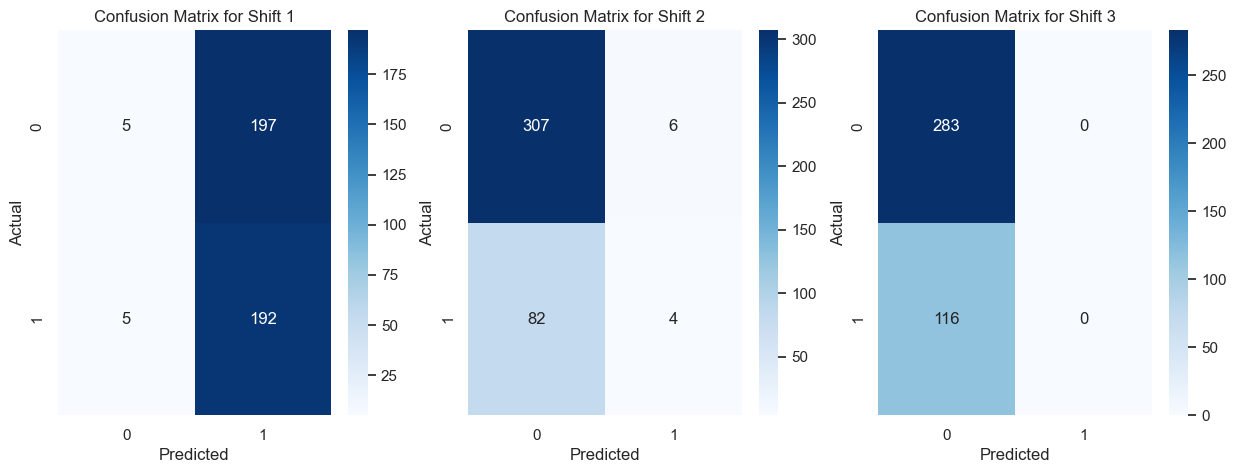

In [177]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# multilabel confusion matrix
nn_cm = multilabel_confusion_matrix(y_test_shift, nn_y_pred_test_shift)

# get the number of labels
num_labels = nn_cm.shape[0]

# print tn, fp, fn, tp for each label
for label_idx in range(num_labels):
    print(f'TN for Shift {label_idx + 1}: {nn_cm[label_idx][0][0]}')
    print(f'FP for Shift {label_idx + 1}: {nn_cm[label_idx][0][1]}')
    print(f'FN for Shift {label_idx + 1}: {nn_cm[label_idx][1][0]}')
    print(f'TP for Shift {label_idx + 1}: {nn_cm[label_idx][1][1]}')
    print('')

# create a single figure with multiple subplots arranged in a row
fig, axes = plt.subplots(1, num_labels, figsize=(num_labels*5, 5))

# plot the confusion matrix for each label
for label_idx in range(num_labels):
    sns.heatmap(rf_cm[label_idx], annot=True, fmt='d', cmap='Blues', ax=axes[label_idx])
    axes[label_idx].set_title(f'Confusion Matrix for Shift {label_idx + 1}')
    axes[label_idx].set_xlabel('Predicted')
    axes[label_idx].set_ylabel('Actual')

plt.show()

***
# Conclusion

## Regressors Evaluation

| Algorithm Type          | Grid Search Parameters                                                                                                                                                  | Grid Search Score | Evaluation Score    |
|-------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------|---------------------|
| Random Forest Regressor | {'max_depth': 10, 'n_estimators': 4096}                                                                                                                               | 0.00010576067475  | 0.00008780418288836214 |
| Decision Tree Regressor | {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'splitter': 'best'}   | 0.00009823997553  | 0.0000706322366246349  |
| Neural Network Regressor| {'max_iter': 500, 'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.0003, 'solver': 'sgd', 'validation_fraction': 0.2} | 0.001021          | 0.00007523000988983618 |


Based on the table provided, we can conclude the following:

Among the three algorithms tested (Random Forest Regressor, Decision Tree Regressor, and Neural Network Regressor), the Decision Tree Regressor achieved the lowest evaluation score of 0.0000706. This suggests that the Decision Tree Regressor performed better than the other two models in this specific problem.

The grid search scores for each algorithm indicate the performance of the models during the hyperparameter tuning process. These scores can provide insights into how well the models performed with the best hyperparameters found during the grid search. In this case, the Decision Tree Regressor had the lowest grid search score (0.0000982), and its evaluation score was also the lowest among the three models.

| Algorithm Type           | Mean   | Std    | Min     | 25%     | 50%     | 75%      | Max     |
|-------------------------|--------|--------|---------|---------|---------|----------|---------|
| Random Forest Regressor  | 816.71 | 549.21 | 65.962  | 461.248 | 662.016 | 1040.13  | 4050.27 |
| Decision Tree Regressor  | 755.85 | 458.94 | 165.729 | 416.391 | 675.385 | 909.731  | 3867.94 |
| Neural Network Regressor | 821.89 | 458.40 | 26.977  | 524.319 | 735.771 | 1043.408 | 3940.07 |


## Classifiers Evaluation

| Algorithm Type            | Grid Search Score (ROC AUC) | Evaluation Metric (ROC AUC) |
|--------------------------|------------------------------|------------------------------|
| Random Forest Classifier  | 0.785                        | 0.615                        |
| Decision Tree Classifier  | 0.711                        | 0.622                        |
| Neural Network Classifier | 0.763                        | 0.621                        |
